EL OBJETIVO DE ESTE PROYECTO ES OPTIMIZAR UN PROCESO DE MINERÍA EN CHILE,
 MEDIANTE MACHINE LEARNING.

El rango temporal de nuestros datos se situa en el año 2021 desde el mes de Mayo al mes de Septiembre

In [247]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [248]:
from math import sqrt
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
SEED = 42

In [249]:
import warnings
warnings.filterwarnings('ignore')

DATASETS A ESTUDIO, dataframe df_paradas

In [250]:
df_paradas=pd.read_csv("/content/sample_data/1.1dataset_8_nuevas_variables.csv", sep=";", encoding='utf-8')

In [251]:
df_paradas.head(25)


,CLASE_ROCA,FECHA,TURNO,DETALLE_PARADA,Nº_DE_PARADAS,HORAS_DE_PARADA,HORAS_EFECTIVAS,EFIC_TOTAL_DÍA,AVANCE,PARADA1,PARADA2,PARADA3,PARADA4,PARADA5,PARADA6,CLASIFICACIÓN_PARADAS1,CLASIFICACIÓN_PARADAS2,CLASIFICACIÓN_PARADAS3,CLASIFICACIÓN_PARADAS4,CLASIFICACIÓN_PARADAS5,CLASIFICACIÓN_PARADAS6,EQUIPO1,EQUIPO2,EQUIPO3,EQUIPO4,EQUIPO5,EQUIPO6
0,CS4,05/05/2021,1,ESPERA DE TOPOGRAFIA,1,"1,75","19,25","91,67","5,5",ESPERA,NaN,NaN,NaN,NaN,NaN,COORDINACIÓN OPERACIONAL,NaN,NaN,NaN,NaN,NaN,TOPOGRAFÍA,EQUIPO LEVANTE,NaN,NaN,NaN,NaN
1,CS4,06/05/2021,2,PANA DE LECHADORA TODA LA MAÑANA Y FALTA MANGERA,2,"6,75","14,25","67,86","4,07",PANNE,SIN ENERGÍA,NaN,NaN,NaN,NaN,FALLA EQUIPOS,SERVICIOS Y SUMINISTROS,NaN,NaN,NaN,NaN,LECHADORA,ENERGIA,NaN,NaN,NaN,NaN
2,CS4,09/05/2021,1,PROBLEMAS DE EQUIPO SHOTCRETE PUTZMEISTER,1,"6,5","14,5","69,05","4,14",PANNE,NaN,NaN,NaN,NaN,NaN,FALLA EQUIPOS,NaN,NaN,NaN,NaN,NaN,ROBOSHOT,NaN,NaN,NaN,NaN,NaN
3,CS4,12/05/2021,1,CORTE DE ENERGÍA,2,"3,23","17,77","84,62","5,08",SIN ENERGÍA,TRASLADO MATERIALES,NaN,NaN,NaN,NaN,SERVICIOS Y SUMINISTROS,COORDINACIÓN OPERACIONAL,NaN,NaN,NaN,NaN,ENERGIA,MATERIALES,NaN,NaN,NaN,NaN
4,CS4,14/05/2021,1,SIN ENERGÍA,2,"1,33","19,67","93,67","5,62",SIN ENERGÍA,ESPERA,NaN,NaN,NaN,NaN,SERVICIOS Y SUMINISTROS,COORDINACIÓN OPERACIONAL,NaN,NaN,NaN,NaN,ENERGIA,GRUA,NaN,NaN,NaN,NaN
5,CS4,17/05/2021,1,EN ESPERA DE EXPLOSIVOSZ,1,"2,25","18,75","89,29","5,36",ESPERA,NaN,NaN,NaN,NaN,NaN,CODELCO VP,NaN,NaN,NaN,NaN,NaN,EXPLOSIVOS,NaN,NaN,NaN,NaN,NaN
6,CS4,18/05/2021,1,CORTE ELECTRICO,4,"8,08","12,92","61,52","3,69",SIN ENERGÍA,SIN OPERADOR,TRASLADO MATERIALES,ESPERA,NaN,NaN,SERVICIOS Y SUMINISTROS,PERSONAL,COORDINACIÓN OPERACIONAL,CODELCO VP,NaN,NaN,ENERGIA,OPERADORES,MATERIALES,MIXER,NaN,NaN
7,CS4,19/05/2021,2,"TRASLADO MALLAS A FRENTE, LIMPIEZA DE PATAS",4,"5,67","15,33",73,"4,38",TRASLADO MATERIALES,ESPERA,ESPERA,PANNE,NaN,NaN,COORDINACIÓN OPERACIONAL,CODELCO VP,PERSONAL,FALLA EQUIPOS,NaN,NaN,MATERIALES,MIXER,OPERADORES,EQUIPO LEVANTE,NaN,NaN
8,CS4,20/05/2021,2,ESPERA OPERADOR MANITOU PARA MARCAR PERNOS TOP...,4,"7,25","13,75","65,48","3,93",ESPERA,PANNE,ESPERA,TRASLADO MATERIALES,NaN,NaN,PERSONAL,FALLA EQUIPOS,COORDINACIÓN OPERACIONAL,COORDINACIÓN OPERACIONAL,NaN,NaN,OPERADORES,LECHADORA,LECHADORA,MATERIALES,NaN,NaN
9,CS4,21/05/2021,2,"LECHADORA MALA, FALLÓ MOTOR DE REVOLVEDOR",5,"5,25","15,75",75,"4,5",PANNE,TRASLADO MATERIALES,ESPERA,ESPERA,PANNE,NaN,FALLA EQUIPOS,COORDINACIÓN OPERACIONAL,COORDINACIÓN OPERACIONAL,COORDINACIÓN OPERACIONAL,FALLA EQUIPOS,NaN,LECHADORA,MATERIALES,LECHADORA,EQUIPO NO DEFINIDO,LECHADORA,NaN


In [252]:
print(df_paradas.duplicated().sum(), 'duplicated rows')

0 duplicated rows


In [253]:
#Vemos que hay nulos en nuestro dataset.
df_paradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CLASE_ROCA              129 non-null    object
 1   FECHA                   129 non-null    object
 2   TURNO                   129 non-null    int64 
 3   DETALLE_PARADA          129 non-null    object
 4   Nº_DE_PARADAS           129 non-null    int64 
 5   HORAS_DE_PARADA         129 non-null    object
 6   HORAS_EFECTIVAS         129 non-null    object
 7   EFIC_TOTAL_DÍA          129 non-null    object
 8   AVANCE                  129 non-null    object
 9   PARADA1                 129 non-null    object
 10  PARADA2                 100 non-null    object
 11  PARADA3                 65 non-null     object
 12  PARADA4                 36 non-null     object
 13  PARADA5                 14 non-null     object
 14  PARADA6                 3 non-null      object
 15  CLASIF

In [254]:
#Sustituimos los nulos por el valor sin parada
df_paradas.fillna('SIN PARADA',inplace=True)

In [255]:
df_paradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CLASE_ROCA              129 non-null    object
 1   FECHA                   129 non-null    object
 2   TURNO                   129 non-null    int64 
 3   DETALLE_PARADA          129 non-null    object
 4   Nº_DE_PARADAS           129 non-null    int64 
 5   HORAS_DE_PARADA         129 non-null    object
 6   HORAS_EFECTIVAS         129 non-null    object
 7   EFIC_TOTAL_DÍA          129 non-null    object
 8   AVANCE                  129 non-null    object
 9   PARADA1                 129 non-null    object
 10  PARADA2                 129 non-null    object
 11  PARADA3                 129 non-null    object
 12  PARADA4                 129 non-null    object
 13  PARADA5                 129 non-null    object
 14  PARADA6                 129 non-null    object
 15  CLASIF

In [256]:
df_paradas.rename(columns={'HORAS_ DE_PARADA':'HORAS_DE_PARADA','EFIC_TOTAL _DÍA':'EFIC_TOTAL_DÍA'}, inplace=True)


In [257]:
#Miramos cuantos valores únicos hay en cada columna.
df_paradas.nunique()

CLASE_ROCA                  3
FECHA                     129
TURNO                       2
DETALLE_PARADA            104
Nº_DE_PARADAS               6
HORAS_DE_PARADA            37
HORAS_EFECTIVAS            37
EFIC_TOTAL_DÍA             37
AVANCE                     37
PARADA1                    14
PARADA2                    12
PARADA3                     8
PARADA4                     7
PARADA5                     6
PARADA6                     3
CLASIFICACIÓN_PARADAS1      7
CLASIFICACIÓN_PARADAS2      8
CLASIFICACIÓN_PARADAS3      7
CLASIFICACIÓN_PARADAS4      5
CLASIFICACIÓN_PARADAS5      5
CLASIFICACIÓN_PARADAS6      3
EQUIPO1                    23
EQUIPO2                    23
EQUIPO3                    16
EQUIPO4                    14
EQUIPO5                     9
EQUIPO6                     4
dtype: int64

In [258]:
#Eliminamos la columna DETALLE_PARADA ya que tenemos muchos tipos diferentes de detalles, hasta 104.
df_paradas.drop(['DETALLE_PARADA'], axis=1, inplace=True)

In [259]:
#Miramos un conteo de las principales paradas para valorar qué paradas vamos a estudiar. Nos quedaremos con las 3 primeras que son las más relevantes.
df_paradas['PARADA1'].value_counts()

ESPERA                        82
PANNE                         25
TRASLADO MATERIALES            6
SIN ENERGÍA                    5
PREPARACIÓN MATERIALES         2
SIN AGUA                       1
CORTE ELECTRICO PROGRAMADO     1
SIN OPERADOR                   1
NO DEFINIDO                    1
CAMBIO DE FRENTE               1
FALTA VENTILACIÓN              1
ORDEN Y ASEO                   1
REPARACIONES                   1
REUNIÓN                        1
Name: PARADA1, dtype: int64

In [260]:
df_paradas['PARADA2'].value_counts()

ESPERA                    63
SIN PARADA                29
PANNE                     18
TRASLADO MATERIALES        8
OBRA ANEXA PLANIFICADA     3
SIN OPERADOR               2
SIN ENERGÍA                1
PREPARACIÓN MATERIALES     1
FALTA VENTILACIÓN          1
SIN AGUA                   1
CONTINGENCIA               1
REPARACIONES               1
Name: PARADA2, dtype: int64

In [261]:
df_paradas['PARADA3'].value_counts()

SIN PARADA                64
ESPERA                    39
PANNE                     17
TRASLADO MATERIALES        3
OBRA ANEXA PLANIFICADA     3
PREPARACIÓN MATERIALES     1
SIN AGUA                   1
SIN ENERGÍA                1
Name: PARADA3, dtype: int64

In [262]:
df_paradas['PARADA4'].value_counts()

SIN PARADA                93
ESPERA                    16
PANNE                     13
TRASLADO MATERIALES        4
SIN ENERGÍA                1
OBRA ANEXA PLANIFICADA     1
SIN AGUA                   1
Name: PARADA4, dtype: int64

In [263]:
df_paradas['PARADA5'].value_counts()

SIN PARADA                115
ESPERA                      6
PANNE                       5
FRAGÜE                      1
PREPARACIÓN MATERIALES      1
SIN AGUA                    1
Name: PARADA5, dtype: int64

In [264]:
df_paradas['PARADA6'].value_counts()

SIN PARADA       126
ESPERA             2
FALTA DRENAJE      1
Name: PARADA6, dtype: int64

CONCLUSIÓN: LAS TRES PARADAS MÁS IMPORTANTES Y QUE VAMOS A LLEVAR A ESTUDIO SON: ESPERA, PANNE Y TRASLADO MATERIALES.

In [265]:
#EN CUANTO A LOS EQUIPOS QUE MÁS FALLAN, TENEMOS:
df_paradas['EQUIPO1'].value_counts()

MIXER                 23
ROBOSHOT              21
JUMBO                 14
MATERIALES            11
TOPOGRAFÍA            10
EXPLOSIVOS            10
LECHADORA              8
OPERADORES             6
ENERGIA                5
EQUIPO LEVANTE         4
DUMPER                 3
EQUIPO NO DEFINIDO     2
EQUIPO SIN DEFINIR     2
REFRIGERACIÓN          1
CORTE ELÉCTRICO        1
MECÁNICO               1
SIN DEFINIR            1
FRENTE                 1
VENTILACIÓN            1
TRONADURA              1
ASEO                   1
REPARACIONES           1
REUNIÓN                1
Name: EQUIPO1, dtype: int64

In [266]:
df_paradas['EQUIPO2'].value_counts()

SIN PARADA            28
MIXER                 18
ROBOSHOT              17
JUMBO                 14
MATERIALES             9
EXPLOSIVOS             8
TOPOGRAFÍA             4
EQUIPO LEVANTE         4
LECHADORA              4
OPERADORES             4
ELÉCTRICOS             3
LEVANTE                3
OBRA ANEXA             2
EQUIPO SIN DEFINIR     2
VENTILACIÓN            1
MINIBUS                1
AGUA                   1
EXCAVADORA             1
EQUIPO                 1
PLANIFICADA            1
ENERGIA                1
GRUA                   1
CONTINGENCIA           1
Name: EQUIPO2, dtype: int64

In [267]:
df_paradas['EQUIPO3'].value_counts()

SIN PARADA            64
ROBOSHOT              14
JUMBO                 10
MIXER                  9
LECHADORA              6
MATERIALES             5
OPERADORES             5
EXPLOSIVOS             4
OBRA ANEXA             3
DUMPER                 3
EQUIPO LEVANTE         1
MIXTA                  1
EQUIPO NO DEFINIDO     1
AGUA                   1
ENERGÍA                1
TOPOGRAFÍA             1
Name: EQUIPO3, dtype: int64

In [268]:
df_paradas['EQUIPO4'].value_counts()

SIN PARADA            93
JUMBO                  9
ROBOSHOT               8
MATERIALES             4
MIXER                  3
TOPOGRAFÍA             3
MIXTA                  2
EQUIPO LEVANTE         1
EQUIPO NO DEFINIDO     1
ENERGÍA                1
TRONADURA              1
PLANIFICADA            1
AGUA                   1
LECHADORA              1
Name: EQUIPO4, dtype: int64

In [269]:
df_paradas['EQUIPO5'].value_counts()

SIN PARADA    115
LECHADORA       4
ROBOSHOT        3
JUMBO           2
FRAGÜE          1
OPERADORES      1
MATERIALES      1
TOPOGRAFÍA      1
AGUA            1
Name: EQUIPO5, dtype: int64

In [270]:
df_paradas['EQUIPO6'].value_counts()

SIN PARADA    126
ROBOSHOT        1
DRENAJE         1
LECHADORA       1
Name: EQUIPO6, dtype: int64

PRIMEROS INSIGHTS

Según los últimos value counts, podemos apreciar que las tres primeras paradas más comunes son:

*   ESPERA
*   PANNE
*   TRASLADO DE MATERIALES

Los tres equipos que más fallan son:
*   MIXER
*   ROBOSHOT
*   JUMBO

In [271]:
df_paradas.head()

,CLASE_ROCA,FECHA,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,HORAS_EFECTIVAS,EFIC_TOTAL_DÍA,AVANCE,PARADA1,PARADA2,PARADA3,PARADA4,PARADA5,PARADA6,CLASIFICACIÓN_PARADAS1,CLASIFICACIÓN_PARADAS2,CLASIFICACIÓN_PARADAS3,CLASIFICACIÓN_PARADAS4,CLASIFICACIÓN_PARADAS5,CLASIFICACIÓN_PARADAS6,EQUIPO1,EQUIPO2,EQUIPO3,EQUIPO4,EQUIPO5,EQUIPO6
0,CS4,05/05/2021,1,1,"1,75","19,25","91,67","5,5",ESPERA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,TOPOGRAFÍA,EQUIPO LEVANTE,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA
1,CS4,06/05/2021,2,2,"6,75","14,25","67,86","4,07",PANNE,SIN ENERGÍA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,FALLA EQUIPOS,SERVICIOS Y SUMINISTROS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,LECHADORA,ENERGIA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA
2,CS4,09/05/2021,1,1,"6,5","14,5","69,05","4,14",PANNE,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,FALLA EQUIPOS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,ROBOSHOT,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA
3,CS4,12/05/2021,1,2,"3,23","17,77","84,62","5,08",SIN ENERGÍA,TRASLADO MATERIALES,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SERVICIOS Y SUMINISTROS,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,ENERGIA,MATERIALES,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA
4,CS4,14/05/2021,1,2,"1,33","19,67","93,67","5,62",SIN ENERGÍA,ESPERA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SERVICIOS Y SUMINISTROS,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,ENERGIA,GRUA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA


In [272]:
# Sustituir comas por puntos en todo el DataFrame
df_paradas = df_paradas.replace(',', '.', regex=True)


In [273]:
df_paradas.head()

,CLASE_ROCA,FECHA,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,HORAS_EFECTIVAS,EFIC_TOTAL_DÍA,AVANCE,PARADA1,PARADA2,PARADA3,PARADA4,PARADA5,PARADA6,CLASIFICACIÓN_PARADAS1,CLASIFICACIÓN_PARADAS2,CLASIFICACIÓN_PARADAS3,CLASIFICACIÓN_PARADAS4,CLASIFICACIÓN_PARADAS5,CLASIFICACIÓN_PARADAS6,EQUIPO1,EQUIPO2,EQUIPO3,EQUIPO4,EQUIPO5,EQUIPO6
0,CS4,05/05/2021,1,1,1.75,19.25,91.67,5.5,ESPERA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,TOPOGRAFÍA,EQUIPO LEVANTE,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA
1,CS4,06/05/2021,2,2,6.75,14.25,67.86,4.07,PANNE,SIN ENERGÍA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,FALLA EQUIPOS,SERVICIOS Y SUMINISTROS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,LECHADORA,ENERGIA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA
2,CS4,09/05/2021,1,1,6.5,14.5,69.05,4.14,PANNE,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,FALLA EQUIPOS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,ROBOSHOT,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA
3,CS4,12/05/2021,1,2,3.23,17.77,84.62,5.08,SIN ENERGÍA,TRASLADO MATERIALES,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SERVICIOS Y SUMINISTROS,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,ENERGIA,MATERIALES,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA
4,CS4,14/05/2021,1,2,1.33,19.67,93.67,5.62,SIN ENERGÍA,ESPERA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SERVICIOS Y SUMINISTROS,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,ENERGIA,GRUA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA


In [274]:
df_paradas.tail()

,CLASE_ROCA,FECHA,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,HORAS_EFECTIVAS,EFIC_TOTAL_DÍA,AVANCE,PARADA1,PARADA2,PARADA3,PARADA4,PARADA5,PARADA6,CLASIFICACIÓN_PARADAS1,CLASIFICACIÓN_PARADAS2,CLASIFICACIÓN_PARADAS3,CLASIFICACIÓN_PARADAS4,CLASIFICACIÓN_PARADAS5,CLASIFICACIÓN_PARADAS6,EQUIPO1,EQUIPO2,EQUIPO3,EQUIPO4,EQUIPO5,EQUIPO6
124,CS3,21/09/2021,2,3,1.75,19.25,91.67,5.5,REUNIÓN,ESPERA,ESPERA,SIN PARADA,SIN PARADA,SIN PARADA,PERSONAL,COORDINACIÓN OPERACIONAL,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,REUNIÓN,LECHADORA,TOPOGRAFÍA,SIN PARADA,SIN PARADA,SIN PARADA
125,CS3,22/09/2021,1,2,1,20,95.24,5.71,TRASLADO MATERIALES,ESPERA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,COORDINACIÓN OPERACIONAL,CODELCO VP,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,MATERIALES,EXPLOSIVOS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA
126,CS3,23/09/2021,1,2,2.5,18.5,88.1,5.29,PANNE,ESPERA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,FALLA EQUIPOS,CODELCO VP,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,ROBOSHOT,EXPLOSIVOS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA
127,CS3,24/09/2021,1,1,3.5,17.5,83.33,5,ESPERA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,CODELCO VP,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,EXPLOSIVOS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA
128,CS3,25/09/2021,1,3,1.5,19.5,92.86,5.57,PANNE,PANNE,OBRA ANEXA PLANIFICADA,SIN PARADA,SIN PARADA,SIN PARADA,FALLA EQUIPOS,FALLA EQUIPOS,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,LECHADORA,EQUIPO LEVANTE,OBRA ANEXA,SIN PARADA,SIN PARADA,SIN PARADA


In [275]:
#Miramos filas duplicadas.
print(df_paradas.duplicated().sum(), 'duplicated rows')

0 duplicated rows


In [276]:
#df_paradas.drop_duplicates(inplace=True), en el caso de que haya duplicados.

In [277]:
#duplicadas = df_paradas[df_paradas.duplicated(keep=False)]

In [278]:
#print(duplicadas)

In [279]:
df_paradas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CLASE_ROCA              129 non-null    object
 1   FECHA                   129 non-null    object
 2   TURNO                   129 non-null    int64 
 3   Nº_DE_PARADAS           129 non-null    int64 
 4   HORAS_DE_PARADA         129 non-null    object
 5   HORAS_EFECTIVAS         129 non-null    object
 6   EFIC_TOTAL_DÍA          129 non-null    object
 7   AVANCE                  129 non-null    object
 8   PARADA1                 129 non-null    object
 9   PARADA2                 129 non-null    object
 10  PARADA3                 129 non-null    object
 11  PARADA4                 129 non-null    object
 12  PARADA5                 129 non-null    object
 13  PARADA6                 129 non-null    object
 14  CLASIFICACIÓN_PARADAS1  129 non-null    object
 15  CLASIF

In [280]:
#Vamos a crear una columna nueva que nos va a decir cuantas veces aparece la palabra 'ESPERA' en el rango de columnas desde la 9 a la 14.
def contar_espera(row):
    conteo = 0
    for col in row[8:14]:  # Columnas 9 a 14 (Python usa índices base 0)
        if 'ESPERA' in str(col):
            conteo += 1
    return conteo

# Aplica la función a lo largo de las filas y crea una nueva columna 'ESPERA_TOTAL'
df_paradas['ESPERA_TOTAL'] = df_paradas.apply(contar_espera, axis=1)

In [281]:
df_paradas.head()

,CLASE_ROCA,FECHA,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,HORAS_EFECTIVAS,EFIC_TOTAL_DÍA,AVANCE,PARADA1,PARADA2,PARADA3,PARADA4,PARADA5,PARADA6,CLASIFICACIÓN_PARADAS1,CLASIFICACIÓN_PARADAS2,CLASIFICACIÓN_PARADAS3,CLASIFICACIÓN_PARADAS4,CLASIFICACIÓN_PARADAS5,CLASIFICACIÓN_PARADAS6,EQUIPO1,EQUIPO2,EQUIPO3,EQUIPO4,EQUIPO5,EQUIPO6,ESPERA_TOTAL
0,CS4,05/05/2021,1,1,1.75,19.25,91.67,5.5,ESPERA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,TOPOGRAFÍA,EQUIPO LEVANTE,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,1
1,CS4,06/05/2021,2,2,6.75,14.25,67.86,4.07,PANNE,SIN ENERGÍA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,FALLA EQUIPOS,SERVICIOS Y SUMINISTROS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,LECHADORA,ENERGIA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,0
2,CS4,09/05/2021,1,1,6.5,14.5,69.05,4.14,PANNE,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,FALLA EQUIPOS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,ROBOSHOT,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,0
3,CS4,12/05/2021,1,2,3.23,17.77,84.62,5.08,SIN ENERGÍA,TRASLADO MATERIALES,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SERVICIOS Y SUMINISTROS,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,ENERGIA,MATERIALES,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,0
4,CS4,14/05/2021,1,2,1.33,19.67,93.67,5.62,SIN ENERGÍA,ESPERA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SERVICIOS Y SUMINISTROS,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,ENERGIA,GRUA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,1


In [282]:
df_paradas['ESPERA_TOTAL'].value_counts()

1    51
2    39
3    19
0    15
4     4
6     1
Name: ESPERA_TOTAL, dtype: int64

In [283]:
#Ahora hacemos lo mismo para PANNE y TRASLADO MATERIALES.
#Vamos a crear una columna nueva que nos va a decir cuantas veces aparece la palabra 'PANNE' en el rango de columnas desde la 9 a la 14.
def contar_panne(row):
    conteo = 0
    for col in row[8:14]:  # Columnas 9 a 14 (Python usa índices base 0)
        if 'PANNE' in str(col):
            conteo += 1
    return conteo

# Aplica la función a lo largo de las filas y crea una nueva columna 'PANNE_TOTAL'
df_paradas['PANNE_TOTAL'] = df_paradas.apply(contar_panne, axis=1)

In [284]:
#Vamos a crear una columna nueva que nos va a decir cuantas veces aparece la palabra 'TRASLADO MATERIALES' en el rango de columnas desde la 9 a la 14.
def contar_traslado_materiales(row):
    conteo = 0
    for col in row[8:14]:  # Columnas 9 a 14 (Python usa índices base 0)
        if 'TRASLADO MATERIALES' in str(col):
            conteo += 1
    return conteo

# Aplica la función a lo largo de las filas y crea una nueva columna 'TRASLADO_MATERIALES_TOTAL'
df_paradas['TRASLADO_MATERIALES_TOTAL'] = df_paradas.apply(contar_traslado_materiales, axis=1)

In [285]:
df_paradas['PANNE_TOTAL'].value_counts()

0    67
1    48
2    12
3     2
Name: PANNE_TOTAL, dtype: int64

In [286]:
df_paradas['TRASLADO_MATERIALES_TOTAL'].value_counts()

0    108
1     21
Name: TRASLADO_MATERIALES_TOTAL, dtype: int64

In [287]:
#Ahora aplicamos la misma lógica a los tres equipos que más fallan y crearemos tres columnas nuevas : MIXER_TOTAL, ROBOSHOT_TOTAL, JUMBO_TOTAL.
#Vamos a crear una columna nueva que nos va a decir cuantas veces aparece la palabra 'MIXER' en el rango de columnas desde la 15 a la 20.
def contar_mixer(row):
    conteo = 0
    for col in row[20:25]:  # Columnas 15 a 20 (Python usa índices base 0)
        if 'MIXER' in str(col):
            conteo += 1
    return conteo

# Aplica la función a lo largo de las filas y crea una nueva columna 'MIXER_TOTAL'
df_paradas['MIXER_TOTAL'] = df_paradas.apply(contar_mixer, axis=1)

In [288]:
df_paradas['MIXER_TOTAL'].value_counts()

0    79
1    47
2     3
Name: MIXER_TOTAL, dtype: int64

In [289]:
#Vamos a crear una columna nueva que nos va a decir cuantas veces aparece la palabra 'ROBOSHOT' en el rango de columnas desde la 15 a la 20.
def contar_roboshot(row):
    conteo = 0
    for col in row[20:25]:  # Columnas 15 a 20 (Python usa índices base 0)
        if 'ROBOSHOT' in str(col):
            conteo += 1
    return conteo

# Aplica la función a lo largo de las filas y crea una nueva columna 'ROBOSHOT_TOTAL'
df_paradas['ROBOSHOT_TOTAL'] = df_paradas.apply(contar_roboshot, axis=1)

In [290]:
df_paradas['ROBOSHOT_TOTAL'].value_counts()

0    79
1    37
2    13
Name: ROBOSHOT_TOTAL, dtype: int64

In [291]:
#Vamos a crear una columna nueva que nos va a decir cuantas veces aparece la palabra 'JUMBO' en el rango de columnas desde la 15 a la 20.
def contar_jumbo(row):
    conteo = 0
    for col in row[20:25]:  # Columnas 15 a 20 (Python usa índices base 0)
        if 'JUMBO' in str(col):
            conteo += 1
    return conteo

# Aplica la función a lo largo de las filas y crea una nueva columna 'ROBOSHOT_TOTAL'
df_paradas['JUMBO_TOTAL'] = df_paradas.apply(contar_jumbo, axis=1)

In [292]:
df_paradas['JUMBO_TOTAL'].value_counts()

0    90
1    29
2    10
Name: JUMBO_TOTAL, dtype: int64

In [293]:
df_paradas.drop(['PARADA1', 'PARADA2', 'PARADA3', 'PARADA4', 'PARADA5','PARADA6','EQUIPO1', 'EQUIPO2', 'EQUIPO3', 'EQUIPO4', 'EQUIPO5','EQUIPO6'],axis=1,inplace=True)

In [294]:
df_paradas.head()

,CLASE_ROCA,FECHA,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,HORAS_EFECTIVAS,EFIC_TOTAL_DÍA,AVANCE,CLASIFICACIÓN_PARADAS1,CLASIFICACIÓN_PARADAS2,CLASIFICACIÓN_PARADAS3,CLASIFICACIÓN_PARADAS4,CLASIFICACIÓN_PARADAS5,CLASIFICACIÓN_PARADAS6,ESPERA_TOTAL,PANNE_TOTAL,TRASLADO_MATERIALES_TOTAL,MIXER_TOTAL,ROBOSHOT_TOTAL,JUMBO_TOTAL
0,CS4,05/05/2021,1,1,1.75,19.25,91.67,5.5,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,1,0,0,0,0,0
1,CS4,06/05/2021,2,2,6.75,14.25,67.86,4.07,FALLA EQUIPOS,SERVICIOS Y SUMINISTROS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,0,1,0,0,0,0
2,CS4,09/05/2021,1,1,6.5,14.5,69.05,4.14,FALLA EQUIPOS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,0,1,0,0,1,0
3,CS4,12/05/2021,1,2,3.23,17.77,84.62,5.08,SERVICIOS Y SUMINISTROS,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,0,0,1,0,0,0
4,CS4,14/05/2021,1,2,1.33,19.67,93.67,5.62,SERVICIOS Y SUMINISTROS,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,1,0,0,0,0,0


In [295]:
#Los siguientes pasos son eliminar el campo fecha y convertir en dummie la columna CLASE_ROCA
df_paradas.drop(['FECHA'],axis=1,inplace=True)

In [296]:
#Creamos dummies de las CLASE_ROCA.
df_paradas = pd.get_dummies(df_paradas,columns= ["CLASE_ROCA"])

In [297]:
df_paradas.head()

,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,HORAS_EFECTIVAS,EFIC_TOTAL_DÍA,AVANCE,CLASIFICACIÓN_PARADAS1,CLASIFICACIÓN_PARADAS2,CLASIFICACIÓN_PARADAS3,CLASIFICACIÓN_PARADAS4,CLASIFICACIÓN_PARADAS5,CLASIFICACIÓN_PARADAS6,ESPERA_TOTAL,PANNE_TOTAL,TRASLADO_MATERIALES_TOTAL,MIXER_TOTAL,ROBOSHOT_TOTAL,JUMBO_TOTAL,CLASE_ROCA_CS2,CLASE_ROCA_CS3,CLASE_ROCA_CS4
0,1,1,1.75,19.25,91.67,5.5,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,1,0,0,0,0,0,0,0,1
1,2,2,6.75,14.25,67.86,4.07,FALLA EQUIPOS,SERVICIOS Y SUMINISTROS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,0,1,0,0,0,0,0,0,1
2,1,1,6.5,14.5,69.05,4.14,FALLA EQUIPOS,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,0,1,0,0,1,0,0,0,1
3,1,2,3.23,17.77,84.62,5.08,SERVICIOS Y SUMINISTROS,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,0,0,1,0,0,0,0,0,1
4,1,2,1.33,19.67,93.67,5.62,SERVICIOS Y SUMINISTROS,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,1,0,0,0,0,0,0,0,1


In [298]:
df_paradas.tail()

,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,HORAS_EFECTIVAS,EFIC_TOTAL_DÍA,AVANCE,CLASIFICACIÓN_PARADAS1,CLASIFICACIÓN_PARADAS2,CLASIFICACIÓN_PARADAS3,CLASIFICACIÓN_PARADAS4,CLASIFICACIÓN_PARADAS5,CLASIFICACIÓN_PARADAS6,ESPERA_TOTAL,PANNE_TOTAL,TRASLADO_MATERIALES_TOTAL,MIXER_TOTAL,ROBOSHOT_TOTAL,JUMBO_TOTAL,CLASE_ROCA_CS2,CLASE_ROCA_CS3,CLASE_ROCA_CS4
124,2,3,1.75,19.25,91.67,5.5,PERSONAL,COORDINACIÓN OPERACIONAL,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,2,0,0,0,0,0,0,1,0
125,1,2,1,20,95.24,5.71,COORDINACIÓN OPERACIONAL,CODELCO VP,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,1,0,1,0,0,0,0,1,0
126,1,2,2.5,18.5,88.1,5.29,FALLA EQUIPOS,CODELCO VP,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,1,1,0,0,1,0,0,1,0
127,1,1,3.5,17.5,83.33,5,CODELCO VP,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,SIN PARADA,1,0,0,0,0,0,0,1,0
128,1,3,1.5,19.5,92.86,5.57,FALLA EQUIPOS,FALLA EQUIPOS,COORDINACIÓN OPERACIONAL,SIN PARADA,SIN PARADA,SIN PARADA,0,2,0,0,0,0,0,1,0


In [299]:
df_paradas.drop(['CLASIFICACIÓN_PARADAS1','CLASIFICACIÓN_PARADAS2','CLASIFICACIÓN_PARADAS3','CLASIFICACIÓN_PARADAS4','CLASIFICACIÓN_PARADAS5','CLASIFICACIÓN_PARADAS6'],axis=1,inplace=True)

In [300]:
df_paradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TURNO                      129 non-null    int64 
 1   Nº_DE_PARADAS              129 non-null    int64 
 2   HORAS_DE_PARADA            129 non-null    object
 3   HORAS_EFECTIVAS            129 non-null    object
 4   EFIC_TOTAL_DÍA             129 non-null    object
 5   AVANCE                     129 non-null    object
 6   ESPERA_TOTAL               129 non-null    int64 
 7   PANNE_TOTAL                129 non-null    int64 
 8   TRASLADO_MATERIALES_TOTAL  129 non-null    int64 
 9   MIXER_TOTAL                129 non-null    int64 
 10  ROBOSHOT_TOTAL             129 non-null    int64 
 11  JUMBO_TOTAL                129 non-null    int64 
 12  CLASE_ROCA_CS2             129 non-null    uint8 
 13  CLASE_ROCA_CS3             129 non-null    uint8 
 14  CLASE_ROCA

In [301]:
# Elimina la última fila y actualiza el DataFrame
#df_paradas = df_paradas.drop(df_paradas.index[-1])

In [302]:
#Cambiar las columnas object HORAS_DE_PARADA, HORAS_EFECTIVAS,EFICIENCIA_TOTAL_DÍA Y AVANCE de tipo object a float.
df_paradas['TURNO'] = df_paradas['TURNO'].astype('int')
df_paradas['Nº_DE_PARADAS'] = df_paradas['Nº_DE_PARADAS'].astype('int')
df_paradas['HORAS_DE_PARADA'] = df_paradas['HORAS_DE_PARADA'].astype(float)
df_paradas['HORAS_EFECTIVAS'] = df_paradas['HORAS_EFECTIVAS'].astype(float)
df_paradas['EFIC_TOTAL_DÍA'] = df_paradas['EFIC_TOTAL_DÍA'].astype(float)
df_paradas['AVANCE'] = df_paradas['AVANCE'].astype(float)



##ESPERA_TOTAL--------ESPERA_TOTAL_Sí+1--TARGET1
##PANNE_TOTAL--------PANNE_TOTAL_Sí+1--TARGET1
##TRASLADO_MATERIALES_TOTAL--------TRASLADO_MATERIALES_TOTAL_Sí+1--TARGET1
##MIXER_TOTAL--------PANNE_TOTAL_Sí+1--TARGET1
##ROBOSHOT_TOTAL--------ROBOSHOT_TOTAL_Sí+1--TARGET1
##JUMBO_TOTAL--------JUMBO_TOTAL_Sí+1--TARGET1

In [303]:
#Convertimos la variable ESPERA_TOTAL en variable binaria y nos quedamos con la parte Sí como variable target, la columna No la borramos.
df_paradas['ESPERA_TOTAL'] = df_paradas['ESPERA_TOTAL'].apply(lambda x: 'Sí' if x != 0 else 'No')
df_paradas['PANNE_TOTAL'] = df_paradas['PANNE_TOTAL'].apply(lambda x: 'Sí' if x != 0 else 'No')
df_paradas['TRASLADO_MATERIALES_TOTAL'] = df_paradas['TRASLADO_MATERIALES_TOTAL'].apply(lambda x: 'Sí' if x != 0 else 'No')
df_paradas['MIXER_TOTAL'] = df_paradas['MIXER_TOTAL'].apply(lambda x: 'Sí' if x != 0 else 'No')
df_paradas['ROBOSHOT_TOTAL'] = df_paradas['ROBOSHOT_TOTAL'].apply(lambda x: 'Sí' if x != 0 else 'No')
df_paradas['JUMBO_TOTAL'] = df_paradas['JUMBO_TOTAL'].apply(lambda x: 'Sí' if x != 0 else 'No')

In [304]:
df_paradas.head()

,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,HORAS_EFECTIVAS,EFIC_TOTAL_DÍA,AVANCE,ESPERA_TOTAL,PANNE_TOTAL,TRASLADO_MATERIALES_TOTAL,MIXER_TOTAL,ROBOSHOT_TOTAL,JUMBO_TOTAL,CLASE_ROCA_CS2,CLASE_ROCA_CS3,CLASE_ROCA_CS4
0,1,1,1.75,19.25,91.67,5.50,Sí,No,No,No,No,No,0,0,1
1,2,2,6.75,14.25,67.86,4.07,No,Sí,No,No,No,No,0,0,1
2,1,1,6.50,14.50,69.05,4.14,No,Sí,No,No,Sí,No,0,0,1
3,1,2,3.23,17.77,84.62,5.08,No,No,Sí,No,No,No,0,0,1
4,1,2,1.33,19.67,93.67,5.62,Sí,No,No,No,No,No,0,0,1


In [305]:
df_paradas['MIXER_TOTAL'].value_counts()

No    79
Sí    50
Name: MIXER_TOTAL, dtype: int64

In [306]:
df_paradas = pd.get_dummies(df_paradas,columns= ["ESPERA_TOTAL"])
df_paradas = pd.get_dummies(df_paradas,columns= ["PANNE_TOTAL"])
df_paradas = pd.get_dummies(df_paradas,columns= ["TRASLADO_MATERIALES_TOTAL"])
df_paradas = pd.get_dummies(df_paradas,columns= ["MIXER_TOTAL"])
df_paradas = pd.get_dummies(df_paradas,columns= ["ROBOSHOT_TOTAL"])
df_paradas = pd.get_dummies(df_paradas,columns= ["JUMBO_TOTAL"])

In [307]:
df_paradas.head()

,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,HORAS_EFECTIVAS,EFIC_TOTAL_DÍA,AVANCE,CLASE_ROCA_CS2,CLASE_ROCA_CS3,CLASE_ROCA_CS4,ESPERA_TOTAL_No,ESPERA_TOTAL_Sí,PANNE_TOTAL_No,PANNE_TOTAL_Sí,TRASLADO_MATERIALES_TOTAL_No,TRASLADO_MATERIALES_TOTAL_Sí,MIXER_TOTAL_No,MIXER_TOTAL_Sí,ROBOSHOT_TOTAL_No,ROBOSHOT_TOTAL_Sí,JUMBO_TOTAL_No,JUMBO_TOTAL_Sí
0,1,1,1.75,19.25,91.67,5.50,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0
1,2,2,6.75,14.25,67.86,4.07,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
2,1,1,6.50,14.50,69.05,4.14,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0
3,1,2,3.23,17.77,84.62,5.08,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0
4,1,2,1.33,19.67,93.67,5.62,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0


In [308]:
df_paradas.tail()

,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,HORAS_EFECTIVAS,EFIC_TOTAL_DÍA,AVANCE,CLASE_ROCA_CS2,CLASE_ROCA_CS3,CLASE_ROCA_CS4,ESPERA_TOTAL_No,ESPERA_TOTAL_Sí,PANNE_TOTAL_No,PANNE_TOTAL_Sí,TRASLADO_MATERIALES_TOTAL_No,TRASLADO_MATERIALES_TOTAL_Sí,MIXER_TOTAL_No,MIXER_TOTAL_Sí,ROBOSHOT_TOTAL_No,ROBOSHOT_TOTAL_Sí,JUMBO_TOTAL_No,JUMBO_TOTAL_Sí
124,2,3,1.75,19.25,91.67,5.50,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0
125,1,2,1.00,20.00,95.24,5.71,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
126,1,2,2.50,18.50,88.10,5.29,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0
127,1,1,3.50,17.50,83.33,5.00,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0
128,1,3,1.50,19.50,92.86,5.57,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0


In [309]:
df_paradas.drop(['ESPERA_TOTAL_No','PANNE_TOTAL_No','TRASLADO_MATERIALES_TOTAL_No','MIXER_TOTAL_No','ROBOSHOT_TOTAL_No','JUMBO_TOTAL_No'],axis=1,inplace=True)

In [310]:
#Creamos el target a día+1.
df_paradas["ESPERA_TOTAL_Sí+1"]= df_paradas["ESPERA_TOTAL_Sí"].shift(-1)
df_paradas["PANNE_TOTAL_Sí+1"]= df_paradas["PANNE_TOTAL_Sí"].shift(-1)
df_paradas["TRASLADO_MATERIALES_TOTAL_Sí+1"]= df_paradas["TRASLADO_MATERIALES_TOTAL_Sí"].shift(-1)
df_paradas["MIXER_TOTAL_Sí+1"]= df_paradas["MIXER_TOTAL_Sí"].shift(-1)
df_paradas["ROBOSHOT_TOTAL_Sí+1"]= df_paradas["ROBOSHOT_TOTAL_Sí"].shift(-1)
df_paradas["JUMBO_TOTAL_Sí+1"]= df_paradas["JUMBO_TOTAL_Sí"].shift(-1)

In [311]:
#Sustituimos los nulos por el valor sin parada
df_paradas.fillna('1',inplace=True)

In [312]:
#Cambiamos el tipo de nuestra variable target a int64.
df_paradas['ESPERA_TOTAL_Sí+1'] = df_paradas['ESPERA_TOTAL_Sí+1'].astype('int')
df_paradas['PANNE_TOTAL_Sí+1'] = df_paradas['PANNE_TOTAL_Sí+1'].astype('int')
df_paradas['TRASLADO_MATERIALES_TOTAL_Sí+1'] = df_paradas['TRASLADO_MATERIALES_TOTAL_Sí+1'].astype('int')
df_paradas['MIXER_TOTAL_Sí+1'] = df_paradas['MIXER_TOTAL_Sí+1'].astype('int')
df_paradas['ROBOSHOT_TOTAL_Sí+1'] = df_paradas['ROBOSHOT_TOTAL_Sí+1'].astype('int')
df_paradas['JUMBO_TOTAL_Sí+1'] = df_paradas['JUMBO_TOTAL_Sí+1'].astype('int')

In [313]:
df_paradas.drop(['ESPERA_TOTAL_Sí','PANNE_TOTAL_Sí','TRASLADO_MATERIALES_TOTAL_Sí','MIXER_TOTAL_Sí','ROBOSHOT_TOTAL_Sí','JUMBO_TOTAL_Sí'],axis=1,inplace=True)

In [314]:
#*********************************************************************************************************

In [315]:
#Ya tenemos el df_paradas definitivo con los 6 targets a estudio.
df_paradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TURNO                           129 non-null    int64  
 1   Nº_DE_PARADAS                   129 non-null    int64  
 2   HORAS_DE_PARADA                 129 non-null    float64
 3   HORAS_EFECTIVAS                 129 non-null    float64
 4   EFIC_TOTAL_DÍA                  129 non-null    float64
 5   AVANCE                          129 non-null    float64
 6   CLASE_ROCA_CS2                  129 non-null    uint8  
 7   CLASE_ROCA_CS3                  129 non-null    uint8  
 8   CLASE_ROCA_CS4                  129 non-null    uint8  
 9   ESPERA_TOTAL_Sí+1               129 non-null    int64  
 10  PANNE_TOTAL_Sí+1                129 non-null    int64  
 11  TRASLADO_MATERIALES_TOTAL_Sí+1  129 non-null    int64  
 12  MIXER_TOTAL_Sí+1                129 

In [316]:
df_paradas.isnull().sum()

TURNO                             0
Nº_DE_PARADAS                     0
HORAS_DE_PARADA                   0
HORAS_EFECTIVAS                   0
EFIC_TOTAL_DÍA                    0
AVANCE                            0
CLASE_ROCA_CS2                    0
CLASE_ROCA_CS3                    0
CLASE_ROCA_CS4                    0
ESPERA_TOTAL_Sí+1                 0
PANNE_TOTAL_Sí+1                  0
TRASLADO_MATERIALES_TOTAL_Sí+1    0
MIXER_TOTAL_Sí+1                  0
ROBOSHOT_TOTAL_Sí+1               0
JUMBO_TOTAL_Sí+1                  0
dtype: int64

## Eliminación de variables altamente correlacionadas con el primer target: ESPERA_TOTAL_Sí+1

In [317]:
def correlation(dataset, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Y = pd.DataFrame([colnames,rownames,col_corr]).transpose()
    Y.rename(columns = { 0: 'F1', 1: 'F2', 2: 'CORR' }, inplace=True)
    return Y

In [318]:
#Función para ver qué columna nos quitamos en función de la correlación.
def print_corr(feat1,feat2):
    print('Correlacion ',feat1,'-',feat2,': ',df_paradas[[feat1,feat2]].corr().abs().iloc[0,1])

In [319]:
# Aquí quitamos las variables target porque queremos ver la correlación entre variables y el target no puede estar entre ellas.
df_x = df_paradas.drop(['ESPERA_TOTAL_Sí+1'],axis=1)

In [320]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TURNO                           129 non-null    int64  
 1   Nº_DE_PARADAS                   129 non-null    int64  
 2   HORAS_DE_PARADA                 129 non-null    float64
 3   HORAS_EFECTIVAS                 129 non-null    float64
 4   EFIC_TOTAL_DÍA                  129 non-null    float64
 5   AVANCE                          129 non-null    float64
 6   CLASE_ROCA_CS2                  129 non-null    uint8  
 7   CLASE_ROCA_CS3                  129 non-null    uint8  
 8   CLASE_ROCA_CS4                  129 non-null    uint8  
 9   PANNE_TOTAL_Sí+1                129 non-null    int64  
 10  TRASLADO_MATERIALES_TOTAL_Sí+1  129 non-null    int64  
 11  MIXER_TOTAL_Sí+1                129 non-null    int64  
 12  ROBOSHOT_TOTAL_Sí+1             129 

In [321]:
#En función de lo que nos diga print_corr tendremos que decir que variable de cada pareja, en estas 9 filas, eliminar. Eliminaremos la que tenga menor correlación con nuestro target temperatura D+1.
correlation(df_x,0.9)

,F1,F2,CORR
0,EFIC_TOTAL_DÍA,HORAS_EFECTIVAS,1.0
1,AVANCE,HORAS_EFECTIVAS,0.999991
2,AVANCE,EFIC_TOTAL_DÍA,0.999992


TENEMOS 3 VARIABLES ALTAMENTE CORRELACIONADAS:

*   EFIC_TOTAL_DÍA
*   HORAS_EFECTIVAS
*   AVANCE

##df_target1, target: ESPERA_TOTAL_Sí+1

In [322]:
target1 = 'ESPERA_TOTAL_Sí+1'

In [323]:
#Según los resultados nos quedamos con la variable más correlacionada de las tres y eliminados las dos menos correlacionadas.GRUPO1.
print_corr('EFIC_TOTAL_DÍA',target1)
print_corr('HORAS_EFECTIVAS',target1 )
print_corr('AVANCE',target1 )

Correlacion  EFIC_TOTAL_DÍA - ESPERA_TOTAL_Sí+1 :  0.008148573228630886
Correlacion  HORAS_EFECTIVAS - ESPERA_TOTAL_Sí+1 :  0.008152295333306633
Correlacion  AVANCE - ESPERA_TOTAL_Sí+1 :  0.008093178121894718


In [324]:
#Según el resultado anterior eliminaríamos EFIC_TOTAL_DÍA y AVANCE.
drop_cols1=['EFIC_TOTAL_DÍA','AVANCE']

In [325]:
#Aquí eliminamos estas columnas
df_target1 = df_paradas.drop(columns=drop_cols1, axis=1)

In [326]:
df_target1.head()

,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,HORAS_EFECTIVAS,CLASE_ROCA_CS2,CLASE_ROCA_CS3,CLASE_ROCA_CS4,ESPERA_TOTAL_Sí+1,PANNE_TOTAL_Sí+1,TRASLADO_MATERIALES_TOTAL_Sí+1,MIXER_TOTAL_Sí+1,ROBOSHOT_TOTAL_Sí+1,JUMBO_TOTAL_Sí+1
0,1,1,1.75,19.25,0,0,1,0,1,0,0,0,0
1,2,2,6.75,14.25,0,0,1,0,1,0,0,1,0
2,1,1,6.50,14.50,0,0,1,0,0,1,0,0,0
3,1,2,3.23,17.77,0,0,1,1,0,0,0,0,0
4,1,2,1.33,19.67,0,0,1,1,0,0,0,0,0


In [327]:
#FUNCIÓN PARA REVISAR LOS PORCENTAJES DE LOS BALANCEOS ENTRE SÍ Y NO.
def value_counts_with_percentage(df_target1, columns):
    """
    Calcula el value counts y el porcentaje de valores únicos en las columnas especificadas.

    :param data: DataFrame de pandas que contiene los datos.
    :param columns: Lista de nombres de columnas en las que se realizará el conteo.
    :return: DataFrame con el value counts y el porcentaje de valores únicos.
    """
    result1 = pd.DataFrame()

    for column in columns:
        counts = df_target1[column].value_counts()
        total_count = len(df_paradas)
        percentages = ((counts / total_count) * 100).round(2)
        result1[column] = counts
        result1[column + '(%)'] = percentages

    return result1


result1 = value_counts_with_percentage(df_target1, columns=["ESPERA_TOTAL_Sí+1"])
print(result1)

   ESPERA_TOTAL_Sí+1  ESPERA_TOTAL_Sí+1(%)
1                114                 88.37
0                 15                 11.63


APLICAMOS LOS ALGORITMOS:

*   DecisionTree
*   RandomForestClassifier
*   GradientBoosting
*   xgboost
*   xgboost mejorado

Y LAS MEDIDAS DE RENDIMIENTO DE LOS ALGORITMOS:

*   Accuracy
*   Recall
*   Roc_Auc
*   Precision
*   F1




TARGET 1: ESPERA_TOTAL_Sí+1

In [328]:
target1= "ESPERA_TOTAL_Sí+1"

In [329]:
features = [i for i in df_target1.columns if i != target1]

In [330]:
y = df_target1[target1]
X = df_target1[features]

In [331]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size = 0.30,
                                        random_state = 42)

In [332]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 90
Test data instances: 39


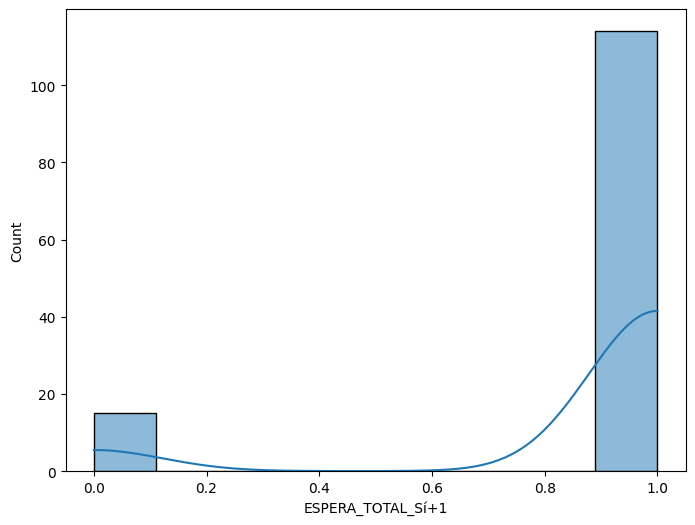

In [333]:
#Visualización del target.
plt.figure(figsize=[8,6])
sns.histplot(y,kde=True)
plt.show()

In [334]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [335]:
accuracy= []
recall =[]
roc_auc= []
precision = []
f1= []

In [336]:
dt_base = DecisionTreeClassifier(random_state=0)

dt_base.fit(X_train, y_train)
y_pred = dt_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [337]:
rf_base = RandomForestClassifier(random_state=0,n_estimators=40)

rf_base.fit(X_train, y_train)
y_pred = rf_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [338]:
gbc_base = GradientBoostingClassifier(random_state=0)

gbc_base.fit(X_train, y_train)
y_pred = gbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [339]:
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0)

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [340]:
model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)

In [341]:
#XGBOOST MEJORADA
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0, scale_pos_weight=7)#se ha incluído el scale_pos_weight=6 que es la proporción entre positivos y negativos de la variable target.

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)
y_prob = xgbc_base.predict_proba(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default', 'XGBoost_mejorado']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)
result_df1

,Accuracy,Recall,Roc_Auc,Precision,F1
DecisionTree_Default,0.84615,0.88889,0.61111,0.94118,0.91429
RandomForest_default,0.92308,1.00000,0.50000,0.92308,0.96000
GradientBoosting_default,0.94872,0.97222,0.81944,0.97222,0.97222
XGBoost_default,0.92308,0.97222,0.65278,0.94595,0.95890
XGBoost_mejorado,0.94872,1.00000,0.66667,0.94737,0.97297


Por el Roc Auc de 0.81944 obtenido, el modelo entrenado de GradientBoosting, se puede escoger como el mejor modelo.

## Eliminación de variables altamente correlacionadas con el segundo target: PANNE_TOTAL_Sí+1+1

In [342]:
def correlation(dataset, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Y = pd.DataFrame([colnames,rownames,col_corr]).transpose()
    Y.rename(columns = { 0: 'F1', 1: 'F2', 2: 'CORR' }, inplace=True)
    return Y

In [343]:
#Función para ver qué columna nos quitamos en función de la correlación.
def print_corr(feat1,feat2):
    print('Correlacion ',feat1,'-',feat2,': ',df_paradas[[feat1,feat2]].corr().abs().iloc[0,1])

In [344]:
# Aquí quitamos las variables target porque queremos ver la correlación entre variables y el target no puede estar entre ellas.
df_y = df_paradas.drop(['PANNE_TOTAL_Sí+1'],axis=1)

In [345]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TURNO                           129 non-null    int64  
 1   Nº_DE_PARADAS                   129 non-null    int64  
 2   HORAS_DE_PARADA                 129 non-null    float64
 3   HORAS_EFECTIVAS                 129 non-null    float64
 4   EFIC_TOTAL_DÍA                  129 non-null    float64
 5   AVANCE                          129 non-null    float64
 6   CLASE_ROCA_CS2                  129 non-null    uint8  
 7   CLASE_ROCA_CS3                  129 non-null    uint8  
 8   CLASE_ROCA_CS4                  129 non-null    uint8  
 9   ESPERA_TOTAL_Sí+1               129 non-null    int64  
 10  TRASLADO_MATERIALES_TOTAL_Sí+1  129 non-null    int64  
 11  MIXER_TOTAL_Sí+1                129 non-null    int64  
 12  ROBOSHOT_TOTAL_Sí+1             129 

In [346]:
#En función de lo que nos diga print_corr tendremos que decir que variable de cada pareja, en estas 9 filas, eliminar. Eliminaremos la que tenga menor correlación con nuestro target temperatura D+1.
correlation(df_y,0.9)

,F1,F2,CORR
0,EFIC_TOTAL_DÍA,HORAS_EFECTIVAS,1.0
1,AVANCE,HORAS_EFECTIVAS,0.999991
2,AVANCE,EFIC_TOTAL_DÍA,0.999992


TENEMOS 8 VARIABLES ALTAMENTE CORRELACIONADAS (3 GRUPOS):

*   EFIC_TOTAL_DÍA
*   HORAS_EFECTIVAS
*   AVANCE

##df_target2, target: PANNE_TOTAL_Sí+1

In [347]:
target2 = 'PANNE_TOTAL_Sí+1'

In [348]:
#Según los resultados nos quedamos con la variable más correlacionada de las tres y eliminados las dos menos correlacionadas.GRUPO1.
print_corr('EFIC_TOTAL_DÍA',target2)
print_corr('HORAS_EFECTIVAS',target2)
print_corr('AVANCE',target2)

Correlacion  EFIC_TOTAL_DÍA - PANNE_TOTAL_Sí+1 :  0.027132016691353456
Correlacion  HORAS_EFECTIVAS - PANNE_TOTAL_Sí+1 :  0.02712901323778575
Correlacion  AVANCE - PANNE_TOTAL_Sí+1 :  0.026653688774704087


In [349]:
#Según el resultado anterior eliminaríamos EFIC_TOTAL_DÍA Y HORAS_EFECTIVAS.
drop_cols2=['EFIC_TOTAL_DÍA','HORAS_EFECTIVAS']

In [350]:
#Aquí eliminamos estas columnas
df_target2 = df_paradas.drop(columns=drop_cols2, axis=1)

In [351]:
df_target2.head()

,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,AVANCE,CLASE_ROCA_CS2,CLASE_ROCA_CS3,CLASE_ROCA_CS4,ESPERA_TOTAL_Sí+1,PANNE_TOTAL_Sí+1,TRASLADO_MATERIALES_TOTAL_Sí+1,MIXER_TOTAL_Sí+1,ROBOSHOT_TOTAL_Sí+1,JUMBO_TOTAL_Sí+1
0,1,1,1.75,5.50,0,0,1,0,1,0,0,0,0
1,2,2,6.75,4.07,0,0,1,0,1,0,0,1,0
2,1,1,6.50,4.14,0,0,1,0,0,1,0,0,0
3,1,2,3.23,5.08,0,0,1,1,0,0,0,0,0
4,1,2,1.33,5.62,0,0,1,1,0,0,0,0,0


In [352]:
#fUNCIÓN PARA REVISAR LOS PORCENTAJES DE LOS BALANCEOS ENTRE SÍ Y NO.
def value_counts_with_percentage(df_target2, columns):
    """
    Calcula el value counts y el porcentaje de valores únicos en las columnas especificadas.

    :param data: DataFrame de pandas que contiene los datos.
    :param columns: Lista de nombres de columnas en las que se realizará el conteo.
    :return: DataFrame con el value counts y el porcentaje de valores únicos.
    """
    result1 = pd.DataFrame()

    for column in columns:
        counts = df_target2[column].value_counts()
        total_count = len(df_paradas)
        percentages = ((counts / total_count) * 100).round(2)
        result1[column] = counts
        result1[column + '(%)'] = percentages

    return result1


result1 = value_counts_with_percentage(df_target2, columns=["PANNE_TOTAL_Sí+1"])
print(result1)

   PANNE_TOTAL_Sí+1  PANNE_TOTAL_Sí+1(%)
0                66                51.16
1                63                48.84


APLICAMOS LOS ALGORITMOS:

*   DecisionTree
*   RandomForestClassifier
*   GradientBoosting
*   xgboost
*   xgboost mejorado

Y LAS MEDIDAS DE RENDIMIENTO DE LOS ALGORITMOS:

*   Accuracy
*   Recall
*   Roc_Auc
*   Precision
*   F1




TARGET 2: PANNE_TOTAL_Sí+1

In [353]:
target2= "PANNE_TOTAL_Sí+1"

In [354]:
features = [i for i in df_target2.columns if i != target2]

In [355]:
y = df_target2[target2]
X = df_target2[features]

In [356]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size = 0.14,
                                        random_state = 42)

In [357]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 110
Test data instances: 19


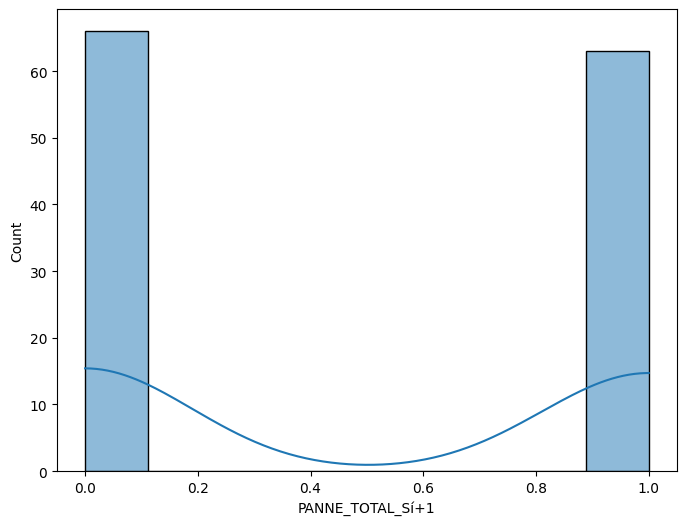

In [358]:
#Visualización del target.
plt.figure(figsize=[8,6])
sns.histplot(y,kde=True)
plt.show()

In [359]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [360]:
accuracy= []
recall =[]
roc_auc= []
precision = []
f1= []

In [361]:
dt_base = DecisionTreeClassifier(random_state=0)

dt_base.fit(X_train, y_train)
y_pred = dt_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [362]:
rf_base = RandomForestClassifier(random_state=0)

rf_base.fit(X_train, y_train)
y_pred = rf_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [363]:
gbc_base = GradientBoostingClassifier(random_state=0)

gbc_base.fit(X_train, y_train)
y_pred = gbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [364]:
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0)

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [365]:
model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)

In [366]:
#XGBOOST MEJORADA
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0, scale_pos_weight=7)#se ha incluído el scale_pos_weight=6 que es la proporción entre positivos y negativos de la variable target.

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)
y_prob = xgbc_base.predict_proba(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default', 'XGBoost_mejorado']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)
result_df1

,Accuracy,Recall,Roc_Auc,Precision,F1
DecisionTree_Default,0.68421,0.875,0.71023,0.58333,0.70000
RandomForest_default,0.57895,0.625,0.58523,0.50000,0.55556
GradientBoosting_default,0.68421,0.750,0.69318,0.60000,0.66667
XGBoost_default,0.68421,0.750,0.69318,0.60000,0.66667
XGBoost_mejorado,0.68421,0.875,0.71023,0.58333,0.70000


Por el Roc Auc el 0.71023 obtenido, de los modelos entrenados de DecisionTree_Default y XGBoost_mejorado, se pueden escoger como los mejores modelos.

## Eliminación de variables altamente correlacionadas con el tercer target: TRASLADO_MATERIALES_TOTAL_Sí+1

In [367]:
def correlation(dataset, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Y = pd.DataFrame([colnames,rownames,col_corr]).transpose()
    Y.rename(columns = { 0: 'F1', 1: 'F2', 2: 'CORR' }, inplace=True)
    return Y

In [368]:
#Función para ver qué columna nos quitamos en función de la correlación.
def print_corr(feat1,feat2):
    print('Correlacion ',feat1,'-',feat2,': ',df_paradas[[feat1,feat2]].corr().abs().iloc[0,1])

In [369]:
# Aquí quitamos las variables target porque queremos ver la correlación entre variables y el target no puede estar entre ellas.
df_z = df_paradas.drop(['TRASLADO_MATERIALES_TOTAL_Sí+1'],axis=1)

In [370]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TURNO                129 non-null    int64  
 1   Nº_DE_PARADAS        129 non-null    int64  
 2   HORAS_DE_PARADA      129 non-null    float64
 3   HORAS_EFECTIVAS      129 non-null    float64
 4   EFIC_TOTAL_DÍA       129 non-null    float64
 5   AVANCE               129 non-null    float64
 6   CLASE_ROCA_CS2       129 non-null    uint8  
 7   CLASE_ROCA_CS3       129 non-null    uint8  
 8   CLASE_ROCA_CS4       129 non-null    uint8  
 9   ESPERA_TOTAL_Sí+1    129 non-null    int64  
 10  PANNE_TOTAL_Sí+1     129 non-null    int64  
 11  MIXER_TOTAL_Sí+1     129 non-null    int64  
 12  ROBOSHOT_TOTAL_Sí+1  129 non-null    int64  
 13  JUMBO_TOTAL_Sí+1     129 non-null    int64  
dtypes: float64(4), int64(7), uint8(3)
memory usage: 11.6 KB


In [371]:
#En función de lo que nos diga print_corr tendremos que decir que variable de cada pareja, en estas 9 filas, eliminar. Eliminaremos la que tenga menor correlación con nuestro target temperatura D+1.
correlation(df_z,0.9)

,F1,F2,CORR
0,EFIC_TOTAL_DÍA,HORAS_EFECTIVAS,1.0
1,AVANCE,HORAS_EFECTIVAS,0.999991
2,AVANCE,EFIC_TOTAL_DÍA,0.999992


TENEMOS 3 VARIABLES ALTAMENTE CORRELACIONADAS:

*   EFIC_TOTAL_DÍA
*   HORAS_EFECTIVAS
*   AVANCE

##df_target3, target: TRASLADO_MATERIALES_TOTAL_Sí+1

In [372]:
target3 = 'TRASLADO_MATERIALES_TOTAL_Sí+1'

In [373]:
#Según los resultados nos quedamos con la variable más correlacionada de las tres y eliminados las dos menos correlacionadas.GRUPO1.
print_corr('EFIC_TOTAL_DÍA',target3)
print_corr('HORAS_EFECTIVAS',target3)
print_corr('AVANCE',target3)

Correlacion  EFIC_TOTAL_DÍA - TRASLADO_MATERIALES_TOTAL_Sí+1 :  0.07271983583508121
Correlacion  HORAS_EFECTIVAS - TRASLADO_MATERIALES_TOTAL_Sí+1 :  0.07272176442474589
Correlacion  AVANCE - TRASLADO_MATERIALES_TOTAL_Sí+1 :  0.07309881072035557


In [374]:
#Según el resultado anterior eliminaríamos HORAS_EFECTIVAS y AVANCE.
drop_cols3=['HORAS_EFECTIVAS','AVANCE']

In [375]:
#Aquí eliminamos estas columnas
df_target3 = df_paradas.drop(columns=drop_cols3, axis=1)

In [376]:
df_target3.head()

,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,EFIC_TOTAL_DÍA,CLASE_ROCA_CS2,CLASE_ROCA_CS3,CLASE_ROCA_CS4,ESPERA_TOTAL_Sí+1,PANNE_TOTAL_Sí+1,TRASLADO_MATERIALES_TOTAL_Sí+1,MIXER_TOTAL_Sí+1,ROBOSHOT_TOTAL_Sí+1,JUMBO_TOTAL_Sí+1
0,1,1,1.75,91.67,0,0,1,0,1,0,0,0,0
1,2,2,6.75,67.86,0,0,1,0,1,0,0,1,0
2,1,1,6.50,69.05,0,0,1,0,0,1,0,0,0
3,1,2,3.23,84.62,0,0,1,1,0,0,0,0,0
4,1,2,1.33,93.67,0,0,1,1,0,0,0,0,0


In [377]:
#FUNCIÓN PARA REVISAR LOS PORCENTAJES DE LOS BALANCEOS ENTRE SÍ Y NO.
def value_counts_with_percentage(df_target3, columns):
    """
    Calcula el value counts y el porcentaje de valores únicos en las columnas especificadas.

    :param data: DataFrame de pandas que contiene los datos.
    :param columns: Lista de nombres de columnas en las que se realizará el conteo.
    :return: DataFrame con el value counts y el porcentaje de valores únicos.
    """
    result1 = pd.DataFrame()

    for column in columns:
        counts = df_target3[column].value_counts()
        total_count = len(df_paradas)
        percentages = ((counts / total_count) * 100).round(2)
        result1[column] = counts
        result1[column + '(%)'] = percentages

    return result1


result1 = value_counts_with_percentage(df_target3, columns=["TRASLADO_MATERIALES_TOTAL_Sí+1"])
print(result1)

   TRASLADO_MATERIALES_TOTAL_Sí+1  TRASLADO_MATERIALES_TOTAL_Sí+1(%)
0                             107                              82.95
1                              22                              17.05


APLICAMOS LOS ALGORITMOS:

*   DecisionTree
*   RandomForestClassifier
*   GradientBoosting
*   xgboost
*   xgboost mejorado

Y LAS MEDIDAS DE RENDIMIENTO DE LOS ALGORITMOS:

*   Accuracy
*   Recall
*   Roc_Auc
*   Precision
*   F1




TARGET 3: TRASLADO_MATERIALES_TOTAL_Sí+1

In [378]:
target3= "TRASLADO_MATERIALES_TOTAL_Sí+1"

In [379]:
features = [i for i in df_target3.columns if i != target3]

In [380]:
y = df_target3[target3]
X = df_target3[features]

In [381]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size = 0.10,
                                        random_state = 42)

In [382]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 116
Test data instances: 13


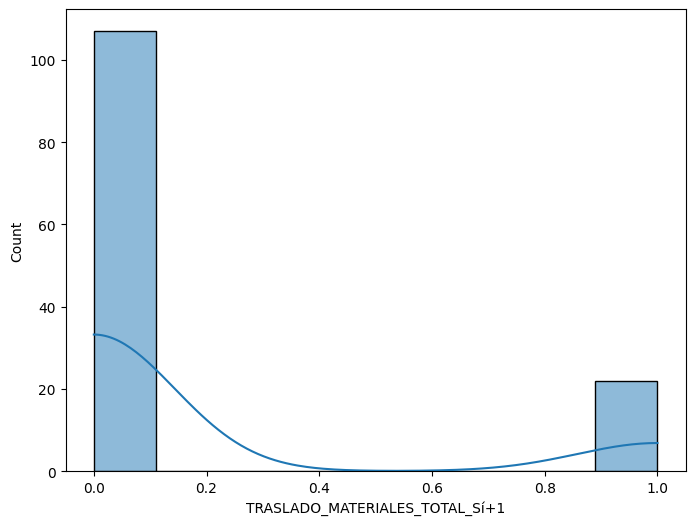

In [383]:
#Visualización del target.
plt.figure(figsize=[8,6])
sns.histplot(y,kde=True)
plt.show()

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [385]:
accuracy= []
recall =[]
roc_auc= []
precision = []
f1= []

In [386]:
dt_base = DecisionTreeClassifier(random_state=0)

dt_base.fit(X_train, y_train)
y_pred = dt_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [387]:
rf_base = RandomForestClassifier(random_state=0)

rf_base.fit(X_train, y_train)
y_pred = rf_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [388]:
gbc_base = GradientBoostingClassifier(random_state=0)

gbc_base.fit(X_train, y_train)
y_pred = gbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [389]:
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0)

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [390]:
model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)

In [391]:
#XGBOOST MEJORADA
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0, scale_pos_weight=6)#se ha incluído el scale_pos_weight=6 que es la proporción entre positivos y negativos de la variable target.

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)
y_prob = xgbc_base.predict_proba(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default', 'XGBoost_mejorado']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)
result_df1

,Accuracy,Recall,Roc_Auc,Precision,F1
DecisionTree_Default,0.61538,0.00000,0.40000,0.00000,0.00000
RandomForest_default,0.69231,0.00000,0.45000,0.00000,0.00000
GradientBoosting_default,0.76923,0.33333,0.61667,0.50000,0.40000
XGBoost_default,0.69231,0.00000,0.45000,0.00000,0.00000
XGBoost_mejorado,0.84615,0.66667,0.78333,0.66667,0.66667


Por el Roc Auc de 0.7833 obtenido, el modelo entrenado de XGBoost_mejorado, se puede escoger como el mejor modelo.

## Eliminación de variables altamente correlacionadas con el cuarto target: MIXER_TOTAL_Sí+1

In [392]:
def correlation(dataset, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Y = pd.DataFrame([colnames,rownames,col_corr]).transpose()
    Y.rename(columns = { 0: 'F1', 1: 'F2', 2: 'CORR' }, inplace=True)
    return Y

In [393]:
#Función para ver qué columna nos quitamos en función de la correlación.
def print_corr(feat1,feat2):
    print('Correlacion ',feat1,'-',feat2,': ',df_paradas[[feat1,feat2]].corr().abs().iloc[0,1])

In [394]:
# Aquí quitamos las variables target porque queremos ver la correlación entre variables y el target no puede estar entre ellas.
df_a = df_paradas.drop(['MIXER_TOTAL_Sí+1'],axis=1)

In [395]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TURNO                           129 non-null    int64  
 1   Nº_DE_PARADAS                   129 non-null    int64  
 2   HORAS_DE_PARADA                 129 non-null    float64
 3   HORAS_EFECTIVAS                 129 non-null    float64
 4   EFIC_TOTAL_DÍA                  129 non-null    float64
 5   AVANCE                          129 non-null    float64
 6   CLASE_ROCA_CS2                  129 non-null    uint8  
 7   CLASE_ROCA_CS3                  129 non-null    uint8  
 8   CLASE_ROCA_CS4                  129 non-null    uint8  
 9   ESPERA_TOTAL_Sí+1               129 non-null    int64  
 10  PANNE_TOTAL_Sí+1                129 non-null    int64  
 11  TRASLADO_MATERIALES_TOTAL_Sí+1  129 non-null    int64  
 12  ROBOSHOT_TOTAL_Sí+1             129 

In [396]:
#En función de lo que nos diga print_corr tendremos que decir que variable de cada pareja, en estas 9 filas, eliminar. Eliminaremos la que tenga menor correlación con nuestro target temperatura D+1.
correlation(df_a,0.9)

,F1,F2,CORR
0,EFIC_TOTAL_DÍA,HORAS_EFECTIVAS,1.0
1,AVANCE,HORAS_EFECTIVAS,0.999991
2,AVANCE,EFIC_TOTAL_DÍA,0.999992


TENEMOS 3 VARIABLES ALTAMENTE CORRELACIONADAS:

*   EFIC_TOTAL_DÍA
*   HORAS_EFECTIVAS
*   AVANCE

##df_target4, target: MIXER_TOTAL_Sí+1

In [397]:
target4 = 'MIXER_TOTAL_Sí+1'

In [398]:
#Según los resultados nos quedamos con la variable más correlacionada de las tres y eliminados las dos menos correlacionadas.GRUPO1.
print_corr('EFIC_TOTAL_DÍA',target4)
print_corr('HORAS_EFECTIVAS',target4)
print_corr('AVANCE',target4)

Correlacion  EFIC_TOTAL_DÍA - MIXER_TOTAL_Sí+1 :  0.016800973240022783
Correlacion  HORAS_EFECTIVAS - MIXER_TOTAL_Sí+1 :  0.016804481499551573
Correlacion  AVANCE - MIXER_TOTAL_Sí+1 :  0.016647740241523427


In [399]:
#Según el resultado anterior eliminaríamos EFIC_TOTAL_DÍA y HORAS_EFECTIVAS.
drop_cols4=['EFIC_TOTAL_DÍA','HORAS_EFECTIVAS']

In [400]:
#Aquí eliminamos estas columnas
df_target4 = df_paradas.drop(columns=drop_cols4, axis=1)

In [401]:
df_target4.head()

,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,AVANCE,CLASE_ROCA_CS2,CLASE_ROCA_CS3,CLASE_ROCA_CS4,ESPERA_TOTAL_Sí+1,PANNE_TOTAL_Sí+1,TRASLADO_MATERIALES_TOTAL_Sí+1,MIXER_TOTAL_Sí+1,ROBOSHOT_TOTAL_Sí+1,JUMBO_TOTAL_Sí+1
0,1,1,1.75,5.50,0,0,1,0,1,0,0,0,0
1,2,2,6.75,4.07,0,0,1,0,1,0,0,1,0
2,1,1,6.50,4.14,0,0,1,0,0,1,0,0,0
3,1,2,3.23,5.08,0,0,1,1,0,0,0,0,0
4,1,2,1.33,5.62,0,0,1,1,0,0,0,0,0


In [402]:
#FUNCIÓN PARA REVISAR LOS PORCENTAJES DE LOS BALANCEOS ENTRE SÍ Y NO.
def value_counts_with_percentage(df_target4, columns):
    """
    Calcula el value counts y el porcentaje de valores únicos en las columnas especificadas.

    :param data: DataFrame de pandas que contiene los datos.
    :param columns: Lista de nombres de columnas en las que se realizará el conteo.
    :return: DataFrame con el value counts y el porcentaje de valores únicos.
    """
    result1 = pd.DataFrame()

    for column in columns:
        counts = df_target4[column].value_counts()
        total_count = len(df_paradas)
        percentages = ((counts / total_count) * 100).round(2)
        result1[column] = counts
        result1[column + '(%)'] = percentages

    return result1


result1 = value_counts_with_percentage(df_target4, columns=["MIXER_TOTAL_Sí+1"])
print(result1)

   MIXER_TOTAL_Sí+1  MIXER_TOTAL_Sí+1(%)
0                78                60.47
1                51                39.53


APLICAMOS LOS ALGORITMOS:

*   DecisionTree
*   RandomForestClassifier
*   GradientBoosting
*   xgboost
*   xgboost mejorado

Y LAS MEDIDAS DE RENDIMIENTO DE LOS ALGORITMOS:

*   Accuracy
*   Recall
*   Roc_Auc
*   Precision
*   F1




TARGET 4: MIXER_TOTAL_Sí+1

In [403]:
target4= "MIXER_TOTAL_Sí+1"

In [404]:
features = [i for i in df_target4.columns if i != target4]

In [405]:
y = df_target4[target4]
X = df_target4[features]

In [406]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size = 0.15,
                                        random_state = 42)

In [407]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 109
Test data instances: 20


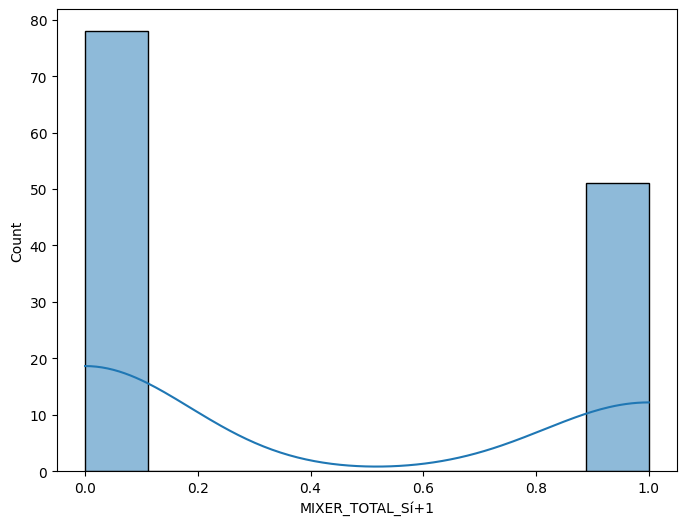

In [408]:
#Visualización del target.
plt.figure(figsize=[8,6])
sns.histplot(y,kde=True)
plt.show()

In [409]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [410]:
accuracy= []
recall =[]
roc_auc= []
precision = []
f1= []

In [411]:
dt_base = DecisionTreeClassifier(random_state=0)

dt_base.fit(X_train, y_train)
y_pred = dt_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [412]:
rf_base = RandomForestClassifier(random_state=0)

rf_base.fit(X_train, y_train)
y_pred = rf_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [413]:
gbc_base = GradientBoostingClassifier(random_state=0)

gbc_base.fit(X_train, y_train)
y_pred = gbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [414]:
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0)

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [415]:
model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)

In [416]:
#XGBOOST MEJORADA
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0, scale_pos_weight=7)#se ha incluído el scale_pos_weight=6 que es la proporción entre positivos y negativos de la variable target.

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)
y_prob = xgbc_base.predict_proba(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default', 'XGBoost_mejorado']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)
result_df1

,Accuracy,Recall,Roc_Auc,Precision,F1
DecisionTree_Default,0.75,0.77778,0.75253,0.70000,0.73684
RandomForest_default,0.50,0.44444,0.49495,0.44444,0.44444
GradientBoosting_default,0.50,0.44444,0.49495,0.44444,0.44444
XGBoost_default,0.70,0.66667,0.69697,0.66667,0.66667
XGBoost_mejorado,0.70,0.66667,0.69697,0.66667,0.66667


Por el Roc Auc de 0.75253 obtenido, el modelo entrenado de DecisionTree_Default, se puede escoger como el mejor modelo.

## Eliminación de variables altamente correlacionadas con el quinto target: ROBOSHOT_TOTAL_Sí+1

In [417]:
def correlation(dataset, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Y = pd.DataFrame([colnames,rownames,col_corr]).transpose()
    Y.rename(columns = { 0: 'F1', 1: 'F2', 2: 'CORR' }, inplace=True)
    return Y

In [418]:
#Función para ver qué columna nos quitamos en función de la correlación.
def print_corr(feat1,feat2):
    print('Correlacion ',feat1,'-',feat2,': ',df_paradas[[feat1,feat2]].corr().abs().iloc[0,1])

In [419]:
# Aquí quitamos las variables target porque queremos ver la correlación entre variables y el target no puede estar entre ellas.
df_b = df_paradas.drop(['ROBOSHOT_TOTAL_Sí+1'],axis=1)

In [420]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TURNO                           129 non-null    int64  
 1   Nº_DE_PARADAS                   129 non-null    int64  
 2   HORAS_DE_PARADA                 129 non-null    float64
 3   HORAS_EFECTIVAS                 129 non-null    float64
 4   EFIC_TOTAL_DÍA                  129 non-null    float64
 5   AVANCE                          129 non-null    float64
 6   CLASE_ROCA_CS2                  129 non-null    uint8  
 7   CLASE_ROCA_CS3                  129 non-null    uint8  
 8   CLASE_ROCA_CS4                  129 non-null    uint8  
 9   ESPERA_TOTAL_Sí+1               129 non-null    int64  
 10  PANNE_TOTAL_Sí+1                129 non-null    int64  
 11  TRASLADO_MATERIALES_TOTAL_Sí+1  129 non-null    int64  
 12  MIXER_TOTAL_Sí+1                129 

In [421]:
#En función de lo que nos diga print_corr tendremos que decir que variable de cada pareja, en estas 9 filas, eliminar. Eliminaremos la que tenga menor correlación con nuestro target temperatura D+1.
correlation(df_b,0.9)

,F1,F2,CORR
0,EFIC_TOTAL_DÍA,HORAS_EFECTIVAS,1.0
1,AVANCE,HORAS_EFECTIVAS,0.999991
2,AVANCE,EFIC_TOTAL_DÍA,0.999992


TENEMOS 3 VARIABLES ALTAMENTE CORRELACIONADAS:

*   EFIC_TOTAL_DÍA
*   HORAS_EFECTIVAS
*   AVANCE

##df_target5, target: ROBOSHOT_TOTAL_Sí+1

In [422]:
target5 = 'ROBOSHOT_TOTAL_Sí+1'

In [423]:
#Según los resultados nos quedamos con la variable más correlacionada de las tres y eliminados las dos menos correlacionadas.GRUPO1.
print_corr('EFIC_TOTAL_DÍA',target5)
print_corr('HORAS_EFECTIVAS',target5)
print_corr('AVANCE',target5)

Correlacion  EFIC_TOTAL_DÍA - ROBOSHOT_TOTAL_Sí+1 :  0.028784310689288606
Correlacion  HORAS_EFECTIVAS - ROBOSHOT_TOTAL_Sí+1 :  0.028789084170102903
Correlacion  AVANCE - ROBOSHOT_TOTAL_Sí+1 :  0.028855070449039774


In [424]:
#Según el resultado anterior eliminaríamos AVANCE y HORAS_EFECTIVAS.
drop_cols5=['AVANCE','HORAS_EFECTIVAS']

In [425]:
#Aquí eliminamos estas columnas
df_target5 = df_paradas.drop(columns=drop_cols5, axis=1)

In [426]:
df_target5.head()

,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,EFIC_TOTAL_DÍA,CLASE_ROCA_CS2,CLASE_ROCA_CS3,CLASE_ROCA_CS4,ESPERA_TOTAL_Sí+1,PANNE_TOTAL_Sí+1,TRASLADO_MATERIALES_TOTAL_Sí+1,MIXER_TOTAL_Sí+1,ROBOSHOT_TOTAL_Sí+1,JUMBO_TOTAL_Sí+1
0,1,1,1.75,91.67,0,0,1,0,1,0,0,0,0
1,2,2,6.75,67.86,0,0,1,0,1,0,0,1,0
2,1,1,6.50,69.05,0,0,1,0,0,1,0,0,0
3,1,2,3.23,84.62,0,0,1,1,0,0,0,0,0
4,1,2,1.33,93.67,0,0,1,1,0,0,0,0,0


In [427]:
#FUNCIÓN PARA REVISAR LOS PORCENTAJES DE LOS BALANCEOS ENTRE SÍ Y NO.
def value_counts_with_percentage(df_target5, columns):
    """
    Calcula el value counts y el porcentaje de valores únicos en las columnas especificadas.

    :param data: DataFrame de pandas que contiene los datos.
    :param columns: Lista de nombres de columnas en las que se realizará el conteo.
    :return: DataFrame con el value counts y el porcentaje de valores únicos.
    """
    result1 = pd.DataFrame()

    for column in columns:
        counts = df_target5[column].value_counts()
        total_count = len(df_paradas)
        percentages = ((counts / total_count) * 100).round(2)
        result1[column] = counts
        result1[column + '(%)'] = percentages

    return result1


result1 = value_counts_with_percentage(df_target5, columns=["ROBOSHOT_TOTAL_Sí+1"])
print(result1)

   ROBOSHOT_TOTAL_Sí+1  ROBOSHOT_TOTAL_Sí+1(%)
0                   78                   60.47
1                   51                   39.53


APLICAMOS LOS ALGORITMOS:

*   DecisionTree
*   RandomForestClassifier
*   GradientBoosting
*   xgboost
*   xgboost mejorado

Y LAS MEDIDAS DE RENDIMIENTO DE LOS ALGORITMOS:

*   Accuracy
*   Recall
*   Roc_Auc
*   Precision
*   F1




TARGET 5: ROBOSHOT_TOTAL_Sí+1

In [428]:
target5= "ROBOSHOT_TOTAL_Sí+1"

In [429]:
features = [i for i in df_target5.columns if i != target5]

In [430]:
y = df_target5[target5]
X = df_target5[features]

In [431]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size = 0.09,
                                        random_state = 42)

In [432]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 117
Test data instances: 12


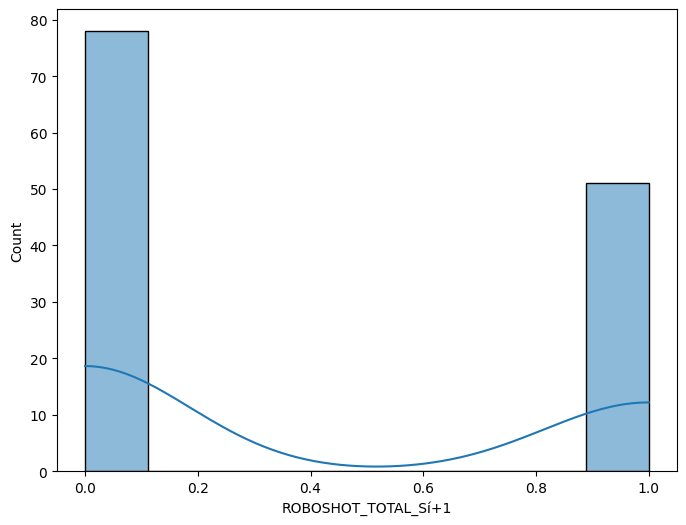

In [433]:
#Visualización del target.
plt.figure(figsize=[8,6])
sns.histplot(y,kde=True)
plt.show()

In [434]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [435]:
accuracy= []
recall =[]
roc_auc= []
precision = []
f1= []

In [436]:
dt_base = DecisionTreeClassifier(random_state=0)

dt_base.fit(X_train, y_train)
y_pred = dt_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [437]:
rf_base = RandomForestClassifier(random_state=0)

rf_base.fit(X_train, y_train)
y_pred = rf_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [438]:
gbc_base = GradientBoostingClassifier(random_state=0)

gbc_base.fit(X_train, y_train)
y_pred = gbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [439]:
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0)

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [440]:
model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)

In [441]:
#XGBOOST MEJORADA
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0, scale_pos_weight=5)#se ha incluído el scale_pos_weight=6 que es la proporción entre positivos y negativos de la variable target.

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)
y_prob = xgbc_base.predict_proba(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default', 'XGBoost_mejorado']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)
result_df1

,Accuracy,Recall,Roc_Auc,Precision,F1
DecisionTree_Default,0.58333,0.5,0.5625,0.40000,0.44444
RandomForest_default,0.75000,1.0,0.8125,0.57143,0.72727
GradientBoosting_default,0.58333,0.5,0.5625,0.40000,0.44444
XGBoost_default,0.75000,1.0,0.8125,0.57143,0.72727
XGBoost_mejorado,0.75000,1.0,0.8125,0.57143,0.72727


Por el Roc Auc de 0.8125 obtenido, el modelo entrenado de XGBoost y el mejorado, se pueden escoger como los mejores modelos.

## Eliminación de variables altamente correlacionadas con el sexto target: JUMBO_TOTAL_Sí+1

In [442]:
def correlation(dataset, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Y = pd.DataFrame([colnames,rownames,col_corr]).transpose()
    Y.rename(columns = { 0: 'F1', 1: 'F2', 2: 'CORR' }, inplace=True)
    return Y

In [443]:
#Función para ver qué columna nos quitamos en función de la correlación.
def print_corr(feat1,feat2):
    print('Correlacion ',feat1,'-',feat2,': ',df_paradas[[feat1,feat2]].corr().abs().iloc[0,1])

In [444]:
# Aquí quitamos las variables target porque queremos ver la correlación entre variables y el target no puede estar entre ellas.
df_c = df_paradas.drop(['JUMBO_TOTAL_Sí+1'],axis=1)

In [445]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TURNO                           129 non-null    int64  
 1   Nº_DE_PARADAS                   129 non-null    int64  
 2   HORAS_DE_PARADA                 129 non-null    float64
 3   HORAS_EFECTIVAS                 129 non-null    float64
 4   EFIC_TOTAL_DÍA                  129 non-null    float64
 5   AVANCE                          129 non-null    float64
 6   CLASE_ROCA_CS2                  129 non-null    uint8  
 7   CLASE_ROCA_CS3                  129 non-null    uint8  
 8   CLASE_ROCA_CS4                  129 non-null    uint8  
 9   ESPERA_TOTAL_Sí+1               129 non-null    int64  
 10  PANNE_TOTAL_Sí+1                129 non-null    int64  
 11  TRASLADO_MATERIALES_TOTAL_Sí+1  129 non-null    int64  
 12  MIXER_TOTAL_Sí+1                129 

In [446]:
#En función de lo que nos diga print_corr tendremos que decir que variable de cada pareja, en estas 9 filas, eliminar. Eliminaremos la que tenga menor correlación con nuestro target temperatura D+1.
correlation(df_c,0.9)

,F1,F2,CORR
0,EFIC_TOTAL_DÍA,HORAS_EFECTIVAS,1.0
1,AVANCE,HORAS_EFECTIVAS,0.999991
2,AVANCE,EFIC_TOTAL_DÍA,0.999992


TENEMOS 3 VARIABLES ALTAMENTE CORRELACIONADAS:

*   EFIC_TOTAL_DÍA
*   HORAS_EFECTIVAS
*   AVANCE

##df_target6, target: JUMBO_TOTAL_Sí+1

In [447]:
target6 = 'JUMBO_TOTAL_Sí+1'

In [448]:
#Según los resultados nos quedamos con la variable más correlacionada de las tres y eliminados las dos menos correlacionadas.GRUPO1.
print_corr('EFIC_TOTAL_DÍA',target6)
print_corr('HORAS_EFECTIVAS',target6)
print_corr('AVANCE',target6)

Correlacion  EFIC_TOTAL_DÍA - JUMBO_TOTAL_Sí+1 :  0.013964570396770716
Correlacion  HORAS_EFECTIVAS - JUMBO_TOTAL_Sí+1 :  0.013970961593672119
Correlacion  AVANCE - JUMBO_TOTAL_Sí+1 :  0.013883560085076473


In [449]:
#Según el resultado anterior eliminaríamos EFIC_TOTAL_DÍA y HORAS_EFECTIVAS.
drop_cols6=['AVANCE','HORAS_EFECTIVAS']

In [450]:
#Aquí eliminamos estas columnas
df_target6 = df_paradas.drop(columns=drop_cols6, axis=1)

In [451]:
df_target6.head()

,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,EFIC_TOTAL_DÍA,CLASE_ROCA_CS2,CLASE_ROCA_CS3,CLASE_ROCA_CS4,ESPERA_TOTAL_Sí+1,PANNE_TOTAL_Sí+1,TRASLADO_MATERIALES_TOTAL_Sí+1,MIXER_TOTAL_Sí+1,ROBOSHOT_TOTAL_Sí+1,JUMBO_TOTAL_Sí+1
0,1,1,1.75,91.67,0,0,1,0,1,0,0,0,0
1,2,2,6.75,67.86,0,0,1,0,1,0,0,1,0
2,1,1,6.50,69.05,0,0,1,0,0,1,0,0,0
3,1,2,3.23,84.62,0,0,1,1,0,0,0,0,0
4,1,2,1.33,93.67,0,0,1,1,0,0,0,0,0


In [452]:
#FUNCIÓN PARA REVISAR LOS PORCENTAJES DE LOS BALANCEOS ENTRE SÍ Y NO.
def value_counts_with_percentage(df_target6, columns):
    """
    Calcula el value counts y el porcentaje de valores únicos en las columnas especificadas.

    :param data: DataFrame de pandas que contiene los datos.
    :param columns: Lista de nombres de columnas en las que se realizará el conteo.
    :return: DataFrame con el value counts y el porcentaje de valores únicos.
    """
    result1 = pd.DataFrame()

    for column in columns:
        counts = df_target6[column].value_counts()
        total_count = len(df_paradas)
        percentages = ((counts / total_count) * 100).round(2)
        result1[column] = counts
        result1[column + '(%)'] = percentages

    return result1


result1 = value_counts_with_percentage(df_target6, columns=["JUMBO_TOTAL_Sí+1"])
print(result1)

   JUMBO_TOTAL_Sí+1  JUMBO_TOTAL_Sí+1(%)
0                89                68.99
1                40                31.01


APLICAMOS LOS ALGORITMOS:

*   DecisionTree
*   RandomForestClassifier
*   GradientBoosting
*   xgboost
*   xgboost mejorado

Y LAS MEDIDAS DE RENDIMIENTO DE LOS ALGORITMOS:

*   Accuracy
*   Recall
*   Roc_Auc
*   Precision
*   F1




TARGET 6: JUMBO_TOTAL_Sí+1

In [453]:
target6= "JUMBO_TOTAL_Sí+1"

In [454]:
features = [i for i in df_target6.columns if i != target6]

In [455]:
y = df_target6[target6]
X = df_target6[features]

In [456]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size = 0.09,
                                        random_state = 42)

In [457]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 117
Test data instances: 12


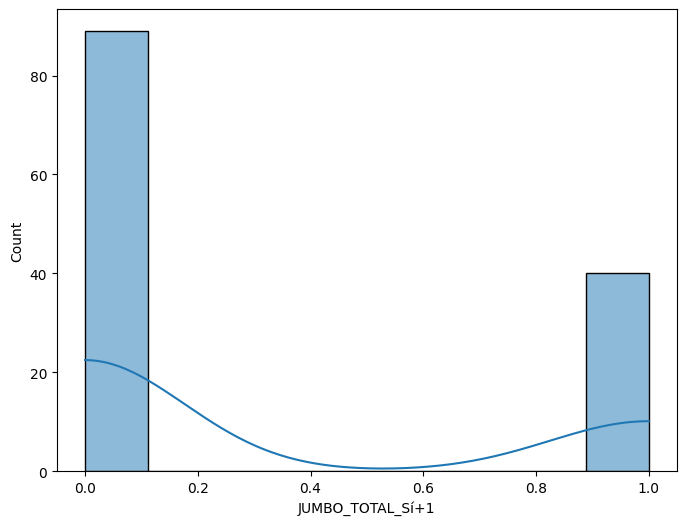

In [458]:
#Visualización del target.
plt.figure(figsize=[8,6])
sns.histplot(y,kde=True)
plt.show()

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [460]:
accuracy= []
recall =[]
roc_auc= []
precision = []
f1= []

In [461]:
dt_base = DecisionTreeClassifier(random_state=0)

dt_base.fit(X_train, y_train)
y_pred = dt_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [462]:
rf_base = RandomForestClassifier(random_state=0)

rf_base.fit(X_train, y_train)
y_pred = rf_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [463]:
gbc_base = GradientBoostingClassifier(random_state=0)

gbc_base.fit(X_train, y_train)
y_pred = gbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [464]:
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0)

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [465]:
model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)

In [466]:
#XGBOOST MEJORADA
import xgboost as xgb
xgbc_base = xgb.XGBClassifier(random_state=0, scale_pos_weight=5)#se ha incluído el scale_pos_weight=6 que es la proporción entre positivos y negativos de la variable target.

xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)
y_prob = xgbc_base.predict_proba(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

model_names = ['DecisionTree_Default','RandomForest_default','GradientBoosting_default', 'XGBoost_default', 'XGBoost_mejorado']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'F1':f1}, index=model_names)
result_df1

,Accuracy,Recall,Roc_Auc,Precision,F1
DecisionTree_Default,0.75000,0.6,0.72857,0.75000,0.66667
RandomForest_default,0.58333,0.2,0.52857,0.50000,0.28571
GradientBoosting_default,0.66667,0.6,0.65714,0.60000,0.60000
XGBoost_default,0.66667,0.4,0.62857,0.66667,0.50000
XGBoost_mejorado,0.83333,0.8,0.82857,0.80000,0.80000


Por el Roc Auc de 0.82857 obtenido, el modelo entrenado de XGBoost_mejorado, se puede escoger como el mejor modelo.

In [ ]:
#*****************************AQUÍ

In [467]:
## A PARTIR DE AQUÍ ES LO QUE ESTAMOS TRABAJANDO, SON PRUEBAS. NO LO TENGAS EN CUENTA.
#SE ESTÁN HACIENDO PRUEBAS Y LOS RESULTADOS SON LOS MISMOS, HABRÍA QUE MIRAR MEJOR EL PREDICT PROBA.

##PREDICT PROBA

In [484]:
y_pred_gbcm = y_pred


In [485]:
y_pred_gbcm

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [486]:
y_pred_gbcm.shape

(12,)

In [487]:
len(y_pred_gbcm)

12

In [488]:
y_prob_gbcm = y_prob

In [489]:
y_prob_gbcm

array([[1.4773929e-01, 8.5226071e-01],
       [7.4872851e-01, 2.5127146e-01],
       [9.4081891e-01, 5.9181117e-02],
       [9.8671067e-01, 1.3289310e-02],
       [9.9505919e-01, 4.9408027e-03],
       [3.8622499e-02, 9.6137750e-01],
       [9.9433964e-01, 5.6603299e-03],
       [7.9661608e-04, 9.9920338e-01],
       [2.0504224e-01, 7.9495776e-01],
       [9.4081891e-01, 5.9181117e-02],
       [1.5251166e-01, 8.4748834e-01],
       [9.9927056e-01, 7.2945148e-04]], dtype=float32)

In [490]:
y_prob_gbcm.shape

(12, 2)

In [491]:
len(y_prob_gbcm)

12

In [492]:
X_test

,TURNO,Nº_DE_PARADAS,HORAS_DE_PARADA,EFIC_TOTAL_DÍA,CLASE_ROCA_CS2,CLASE_ROCA_CS3,CLASE_ROCA_CS4,ESPERA_TOTAL_Sí+1,PANNE_TOTAL_Sí+1,TRASLADO_MATERIALES_TOTAL_Sí+1,MIXER_TOTAL_Sí+1,ROBOSHOT_TOTAL_Sí+1
55,1,2,3.00,85.71,0,1,0,1,1,0,1,0
40,2,4,2.00,90.48,0,1,0,1,0,0,0,0
19,1,1,0.50,97.62,0,0,1,1,0,0,1,1
31,2,5,7.00,66.67,0,0,1,1,0,0,0,0
114,2,3,6.25,70.24,0,1,0,1,1,0,1,0
56,2,3,2.75,86.90,1,0,0,1,1,1,1,1
69,1,3,4.75,77.38,0,1,0,1,0,1,0,0
105,1,3,3.25,84.52,1,0,0,1,1,0,0,0
81,1,2,1.75,91.67,1,0,0,1,0,0,1,0
26,1,1,0.50,97.62,0,0,1,1,0,0,1,1


In [493]:
#output_test = pd.DataFrame({'cid': X_test['cid'], 'compra_pp':y_pred_xgbm, 'prob':y_prob_xgbm[:,1]})
output_test = pd.DataFrame({'ESPERA_TOTAL_Sí+1':y_pred_gbcm, 'prob':y_prob_gbcm[:,1]})

In [494]:
output_test

,ESPERA_TOTAL_Sí+1,prob
0,1,0.852261
1,0,0.251271
2,0,0.059181
3,0,0.013289
4,0,0.004941
5,1,0.961378
6,0,0.005660
7,1,0.999203
8,1,0.794958
9,0,0.059181


In [495]:
output_test.groupby(by='ESPERA_TOTAL_Sí+1').count()

,prob
ESPERA_TOTAL_Sí+1,
0,7
1,5


## TABLA FINAL DE PROPENSION A PARADA ESPERA+1
Listado de predicion de TEST

In [496]:
output_test.sort_values('prob',ascending=False)

,ESPERA_TOTAL_Sí+1,prob
7,1,0.999203
5,1,0.961378
0,1,0.852261
10,1,0.847488
8,1,0.794958
1,0,0.251271
2,0,0.059181
9,0,0.059181
3,0,0.013289
6,0,0.005660


In [497]:
pred_ESPERA = output_test.sort_values('prob',ascending=False)

In [498]:
z = pred_ESPERA.head(20)

In [499]:
z

,ESPERA_TOTAL_Sí+1,prob
7,1,0.999203
5,1,0.961378
0,1,0.852261
10,1,0.847488
8,1,0.794958
1,0,0.251271
2,0,0.059181
9,0,0.059181
3,0,0.013289
6,0,0.005660


In [504]:
output_test2 = pd.DataFrame({'MIXER_TOTAL+1':y_pred_xgbm, 'prob':y_prob[:,1]})

In [505]:
output_test2

,MIXER_TOTAL+1,prob
0,1,0.852261
1,0,0.251271
2,0,0.059181
3,0,0.013289
4,0,0.004941
5,1,0.961378
6,0,0.005660
7,1,0.999203
8,1,0.794958
9,0,0.059181


In [506]:
output_test2.groupby(by='MIXER_TOTAL+1').count()

,prob
MIXER_TOTAL+1,
0,7
1,5


##TABLA FINAL DE PROPENSION A CONTRATACIÓN DE DEBIT CARD ORDENADA POR PROBABILIDAD DE COMPRA

In [507]:
output_test2.sort_values('prob',ascending=False)

,MIXER_TOTAL+1,prob
7,1,0.999203
5,1,0.961378
0,1,0.852261
10,1,0.847488
8,1,0.794958
1,0,0.251271
2,0,0.059181
9,0,0.059181
3,0,0.013289
6,0,0.005660


In [ ]:
y_train

cid
1004863    0
1307055    0
1417695    1
1146446    0
1164558    0
          ..
1435667    0
1016086    0
1377882    0
1438106    0
1444274    1
Name: compra_debitc_ratio, Length: 9357, dtype: int64

In [ ]:
y_train_df=pd.DataFrame(y_train)
y_train_df

,compra_debitc_ratio
cid,
1004863,0
1307055,0
1417695,1
1146446,0
1164558,0
...,...
1435667,0
1016086,0
1377882,0


In [ ]:
y_train_df.reset_index(inplace=True)

In [ ]:
y_train_df

,cid,compra_debitc_ratio
0,1004863,0
1,1307055,0
2,1417695,1
3,1146446,0
4,1164558,0
...,...,...
9352,1435667,0
9353,1016086,0
9354,1377882,0
9355,1438106,0


In [ ]:
y_train_df.rename(columns={"compra_debitc_ratio":"compra_debitc"},inplace=True)

In [ ]:
#se Obtiene el dataframe con las prediciones y la columna de cid del Train
y_train_df

,cid,compra_debitc
0,1004863,0
1,1307055,0
2,1417695,1
3,1146446,0
4,1164558,0
...,...,...
9352,1435667,0
9353,1016086,0
9354,1377882,0
9355,1438106,0


In [ ]:
pred_debitc = pd.concat([output_test, y_train_df], axis=0)

In [ ]:
pred_debitc = pd.concat([output_test, y_train_df], axis=0)

In [ ]:
pred_debitc

,cid,compra_pp,prob,compra_debitc
0,1204957,1.0,0.974182,NaN
1,1258267,0.0,0.426518,NaN
2,1081357,1.0,0.986630,NaN
3,1399715,1.0,0.852734,NaN
4,1227944,1.0,0.796287,NaN
...,...,...,...,...
9352,1435667,NaN,NaN,0.0
9353,1016086,NaN,NaN,0.0
9354,1377882,NaN,NaN,0.0
9355,1438106,NaN,NaN,0.0


In [ ]:
pred_debitc.groupby(by='compra_debitc').count()

,cid,compra_pp,prob
compra_debitc,,,
0.0,6754,0,0
1.0,2603,0,0


## TABLA FINAL DE PROPENSION A CONTRATACIÓN DE DEBIT CARD ORDENADA POR CLIENTES

In [ ]:
#Tabla de prediciones totales ordenadas
pred_debitc.sort_values('compra_debitc', ascending=False)

,cid,compra_pp,prob,compra_debitc
9356,1444274,NaN,NaN,1.0
2976,1340083,NaN,NaN,1.0
2950,1351342,NaN,NaN,1.0
2951,1006151,NaN,NaN,1.0
2952,1117975,NaN,NaN,1.0
...,...,...,...,...
6233,1211013,0.0,0.000361,NaN
6234,1252431,0.0,0.021692,NaN
6235,1330762,0.0,0.150236,NaN
6236,1196052,0.0,0.000161,NaN


###CALCULO DE LA GANANCIA PARA EASY MONEY POR LA COMPRA DE LOS CLIENTES

In [ ]:
ventas.head()

,pk_sale,cid,month_sale,product_ID,net_margin
0,6666,33620,2018-05-01,2335,952.9
1,6667,35063,2018-06-01,2335,1625.2
2,6668,37299,2018-02-01,2335,1279.7
3,6669,39997,2018-02-01,2335,1511.9
4,6670,44012,2018-02-01,2335,1680.3


In [ ]:
dicc_productos.head(15)

,product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account
5,8871,emc_account,account
6,2312,credit_card,payment_card
7,2335,short_term_deposit,investment
8,2336,long_term_deposit,investment
9,2673,securities,investment


GANANCIA MEDIA OBTENIDA POR CLIENTES DE PROPENSION A COMPRA DE PLANES DE PENSIONES

In [ ]:
ventas_clientes_pp = ventas[(ventas['product_ID'] == 1364)]
ventas_clientes_pp


,pk_sale,cid,month_sale,product_ID,net_margin
34696,41362,32376,2018-03-01,1364,6285.8
34697,41363,33205,2018-11-01,1364,6930.9
34698,41364,35849,2019-02-01,1364,6248.8
34699,41365,36148,2018-06-01,1364,3461.5
34700,41366,41264,2019-04-01,1364,8696.3
...,...,...,...,...,...
54060,60726,1551597,2019-05-01,1364,4884.9
54061,60727,1551712,2019-05-01,1364,6028.9
54062,60728,1551832,2019-05-01,1364,4173.2
54063,60729,1552055,2019-05-01,1364,15543.7


In [ ]:
ventas_clientes_pp.cid.nunique()

19369

In [ ]:
#G1 es el valor medio de beneficio de pension plan en la tabla de ventas.
G1 = ventas_clientes_pp.net_margin.mean()
G1

5976.435907894057

In [ ]:
#GT1 es el valor total de beneficio de pension_plan en la tabla de ventas.
GT1 = ventas_clientes_pp.net_margin.sum()
GT1

115757587.1

In [ ]:
RENTABILIDAD_PP = (G1/GT1)*100
RENTABILIDAD_PP

0.005162889152769889

GANANCIA MEDIA OBTENIDA POR CLIENTES DE PROPENSION A COMPRA DE EASY MONEY ACCOUNT.

In [ ]:
ventas_clientes_em_account = ventas[(ventas['product_ID'] == 4657)]
ventas_clientes_em_account

,pk_sale,cid,month_sale,product_ID,net_margin
123338,130004,15891,2018-07-01,4657,66.4
123339,130005,16203,2019-01-01,4657,96.7
123340,130006,16502,2018-10-01,4657,64.3
123341,130007,21719,2018-12-01,4657,60.5
123342,130008,22635,2019-02-01,4657,65.7
...,...,...,...,...,...
240768,247434,1553456,2019-05-01,4657,56.7
240769,247435,1553541,2019-05-01,4657,66.5
240770,247436,1553559,2019-05-01,4657,73.0
240771,247437,1553565,2019-05-01,4657,82.3


In [ ]:
#G2 es el valor medio de beneficio de em_account en la tabla de ventas.
G2 = ventas_clientes_em_account.net_margin.mean()
G2


69.97379231063994

In [ ]:
#GT2 es el valor total de beneficio de em_account en la tabla de ventas.
GT2 = ventas_clientes_em_account.net_margin.sum()
GT2

8217372.300000001

In [ ]:
RENTABILIDAD_EM_ACCOUNT = (G2/GT2)*100
RENTABILIDAD_EM_ACCOUNT

0.000851534891642185

GANANCIA MEDIA OBTENIDA POR CLIENTES DE PROPENSION A COMPRA DE DEBITC.

In [ ]:
ventas_clientes_debitc = ventas[(ventas['product_ID'] == 3819)]
ventas_clientes_debitc

,pk_sale,cid,month_sale,product_ID,net_margin
84498,91164,17457,2018-09-01,3819,56.0
84499,91165,21719,2018-05-01,3819,54.8
84500,91166,22212,2019-04-01,3819,55.7
84501,91167,31624,2018-02-01,3819,57.5
84502,91168,32376,2018-03-01,3819,64.4
...,...,...,...,...,...
123333,129999,1550901,2019-05-01,3819,53.9
123334,130000,1551017,2019-05-01,3819,58.3
123335,130001,1551424,2019-05-01,3819,61.7
123336,130002,1551599,2019-05-01,3819,52.5


In [ ]:
#G3 es el valor medio de beneficio de debitc en la tabla de ventas.
G3 = ventas_clientes_debitc.net_margin.mean()
G3

60.0032157569516

In [ ]:
#GT3 es el valor total de beneficio de debitc en la tabla de ventas.
GT3 = ventas_clientes_debitc.net_margin.sum()
GT3

2330524.9

In [ ]:
RENTABILIDAD_DEBITC = (G3/GT3)*100
RENTABILIDAD_DEBITC

0.0025746652935118436

In [ ]:
#RENTABILIDAD PARA EASY MONEY CADA VEZ QUE SE CONTRATEN LOS TRES PRODUCTOS.
RENTABILIDAD_COMPRA_3_PRODUCTOS = RENTABILIDAD_PP + RENTABILIDAD_EM_ACCOUNT + RENTABILIDAD_DEBITC
RENTABILIDAD_COMPRA_3_PRODUCTOS

0.008589089337923917

In [ ]:
#GANANCIA EN EUROS POR CADA CLIENTE QUE COMPRE LOS TRES PRODUCTOS.
GT = G1 + G2 + G3
GT

6106.412915961648

CONCLUSIÓN: POR CADA CLIENTE MÁS PROPENSOS A COMPRA DE CADA CATEGORÍA QUE COMPREN, EASY MONEY GANARÁ UN 0,0085% DE RENTABILIDAD EN EL MISMO PERÍODO DE TIEMPO.